In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import PatchCollection
import numpy as np
import missingno as msno

During the interviews conducted with the tephrochronology community, one repeated need was being able to assess if the geochemical analyses were comparable or no. 

At present, this question is answered by geochemists by the analysis of secondary standards along with the samples, which allows to understand how comparable are the measurements among laboratories. These secondary standars correspond to specific material (rocks,volcanic glass) for which their chemical composition is "known" and ideally "certified" (e.g. Jochum et al., 2006). The samples and standards are analyzed in batches which are indicated in the dataset under the attribute "MeasurementRun", which links both files in the dataset: TephraDataSet.csv and MeasurementRuns.cv

Two kind of metrics are more rutinely calculated to assess the quality of the analyses:

-	**Accuracy**. Refers to how close to the “known” or "ceretified" value is the measured value. For this, the average analyzed value of each element of the secondary standards are compared to the certified value. Values closer to one are more accurate. 

-	**Precision**. Refers to the dispersion of the analyzed values, it is presented as 
        RSD: relative standard deviation = (Element average/1SD)*100. The RSD allows for the comparison of the dispersion of different elements which can have very different concentrations.        

In [64]:
#Load the data and filter the data analyzed for geochemistry for which the secondary standards information is available.
Data = pd.read_excel("../Data/TephraDataBase_renormalizado.xlsx")
print('\033[1m'+ 'Samples analyzed for geochemical composition'+ '\033[0m')
print(len(Data[Data.MeasuredMaterial!='Organic matter']))

Data = Data.dropna(subset = ['MeasurementRun'])
Data.loc[:,'MeasurementRun'] = Data.loc[:,'MeasurementRun'].astype('str')

Samples ANalyzed for geochemical composition
16731


In [65]:
#Load data of secondary standards analyzed in each run. According with the available information in the literature, the 
#information collected was the MeasurementRun when the standard was analyzed, the name of the standard 
#(e.g. ATHO-G, ML3B-G), the average measured value for each analyzed element, its standard deviation (SD), 
#the relative standard deviation (RSD) and the number of analyses of each standard (n).

Data_standards = pd.read_excel('../Data/TephraDataBase_Standards.xlsx')
Data_standards = Data_standards.dropna(subset = ['Standard'])
Data_standards.loc[:,'MeasurementRun'] = Data_standards.loc[:,'MeasurementRun'].astype('str')
print('\033[1m'+ 'Samples analyzed for geochemical composition for which mean, std and number of analyses of secondary standards information has been informed '+ '\033[0m')
print(len(Data[Data.MeasurementRun.isin(Data_standards[Data_standards.n!= 'Not reported'].MeasurementRun.unique().tolist())]))
print(' ')

print('\033[1m'+ 'Samples analyzed for geochemical composition for which only mean of analyses of secondary standards information has been informed '+ '\033[0m')
print(len(Data[Data.MeasurementRun.isin(Data_standards[Data_standards.n== 'Not reported'].MeasurementRun.unique().tolist())]))

Samples analyzed for geochemical composition for which mean, std and number of analyses of secondary standards information has been informed 
10209
 
Samples analyzed for geochemical composition for which only mean of analyses of secondary standards information has been informed 
134


In [68]:
#Load Standard reference values and filter the ones with error as '95%CL' or 'SD' which correspond to the standars
#with a certified value by Jochum et al., 2006 or by the providers of the standards (e.g. OREAS)
# The values can be accessed at:
#    http://georem.mpch-mainz.gwdg.de/
#    https://www.oreas.com/crm/oreas-184/
#    https://www.oreas.com/crm/oreas-700/
#    https://www.nrcan.gc.ca/our-natural-resources/minerals-mining/mining-resources/sy-4-diorite-gneiss/8025

Standards_ref = pd.read_excel('../Data/Standards_Reference.xlsx')
Standards_ref = Standards_ref[Standards_ref.Standard.isin(['OREAS184', 'GOR132-G', 'GOR128-G', 'OREAS700',
        'BIR-1', 'BHVO-2', 'BHVO-1', 'SY-4', 'KL2-G', 'ML3B-G', 'W-2', 'BCR-2', 'BCR-2G', 'JA-2',
        'T1-G', 'AGV-2', 'StHs6/80-G', 'JA-1', 'NIST610', 'ATHO-G'])].copy()

#Print certified secondary standards in the dataset
temp1 = Standards_ref.Standard.unique().tolist()
print('\033[1m'+ 'Certified Secondary Standards in the dataset'+ '\033[0m')
print(temp1)

#print MeasurementRuns with certified standards
temp2 = Data_standards[Data_standards.Standard.isin(temp1)].MeasurementRun.unique().tolist()
print(" ")
print('\033[1m'+ 'Measurement Runs with Certified Secondary Standards'+ '\033[0m')
print(temp2)

print(" ")
print('\033[1m'+ 'Number of Sample Observations analyzed along with certified secondary standards'+ '\033[0m')
temp3 = Data_standards[Data_standards.Standard.isin(temp1)]
temp4 = temp3[((temp3.SiO2!=-1)&(temp3.SD_SiO2!=-1))|((temp3.Rb!=-1)&(temp3.SD_Rb!=-1))].MeasurementRun.unique().tolist()
print(len(Data[Data.MeasurementRun.isin(temp4)].MeasurementRun))

print(" ")
print('\033[1m'+ 'Number of Sample Observations analyzed along with certified secondary standards publish with mean, std and numebr of analyses'+ '\033[0m')
temp5 = temp3[temp3.n!='Not reported'].MeasurementRun.unique()
print(len(Data[Data.MeasurementRun.isin(temp5)].MeasurementRun))

Certified Secondary Standards in the dataset
['OREAS184', 'GOR132-G', 'GOR128-G', 'OREAS700', 'BIR-1', 'BHVO-2', 'BHVO-1', 'SY-4', 'KL2-G', 'ML3B-G', 'W-2', 'BCR-2', 'BCR-2G', 'JA-2', 'T1-G', 'AGV-2', 'StHs6/80-G', 'JA-1', 'NIST610', 'ATHO-G']
 
Measurement Runs with Certified Secondary Standards
['Rawson2016', '100415', '220115', '230115', 'mr060912', 'mr070912', '100912', '11112', '021112', '61112', '081112', '40413', '050413', '080713', '100713', '120713', '211013', '221013', '131213', '210114', '220114', '140214', '190314', '200314', '210314', '230714', '240714', '250714', '190115', '200115', '130415', '23-Ago-12', '19-Abr-13', 'AllowayMay2014', '8-may-15', '16-abr-13', '12-sept-14', '31-oct-15', 'Geoffroy2018Trace', 'Geoffroy2018Major10um', 'Geoffroy2018MajorSpot', 'Geoffroy2018TracePBN', 'Carel2011Sept', 'Carel2011Dec', '260117', '50717', '231017', '270118', '200318', '050318', '190816', '240117', '250117', '270217', '280217', 'AllowaySOLICPMS2015', 'DelCarlo2018LAICPMS', 'Carel2

In [62]:
print(len(Data[Data.MeasuredMaterial!='Organic matter']))
Data_standards = Data_standards.replace(np.nan,-1)
Data_standards = Data_standards[Data_standards.Standard!=-1]
Data = Data.replace(np.nan,-1)
print(len(Data[Data.MeasurementRun!='Not reported']))
print(Data_standards[Data_standards.n== 'Not reported'].MeasurementRun.unique().tolist())


10891
10891
['Rawson2016', 'AllowaySOLICPMS2015', 'WellerICPMS', 'Gerlach1989', 'Jacques2014', 'Brahm2018', 'WellerEMP']
10209
134


In [31]:
# Estimating Accuracy: Measured Average/ Certified Value for each analyzed element for each secondary standard
MeasuredVsRef = pd.DataFrame(0, index = np.arange(len(Data_standards.Standard)) ,columns = ['MeasurementRun','Standard','SiO2','TiO2','Al2O3','MnO','MgO','Fe2O3T','FeOT','CaO','Na2O','K2O','P2O5','Cl','Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Hf','Ta','Pb','Th','U'])
elementos = ['SiO2','TiO2','Al2O3','MnO','MgO','Fe2O3T','FeOT','CaO','Na2O','K2O','P2O5','Cl','Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Hf','Ta','Pb','Th','U']
Data_standards = Data_standards.replace(np.nan,-1) 
Data_standards = Data_standards.replace('<0.01',-1) 
Data_standards = Data_standards.replace('<0.002',-1)
Data_standards = Data_standards.replace('Over range',-1)
Data_standards = Data_standards.replace('<5',-1)
Data_standards = Data_standards.replace('> 10000',-1)
Data_standards = Data_standards[Data_standards.Standard.isin(Standards_ref[Standards_ref.error.isin(["95%CL","SD"])].Standard.unique().tolist())].copy()

for elemento in elementos:
    MeasuredVsRef[elemento] = MeasuredVsRef[elemento].astype('float64')
    
i=0
for run in Data_standards.MeasurementRun.unique():
    temp = Data_standards[Data_standards.MeasurementRun==run]
    for std in temp.Standard.unique():
        MeasuredVsRef.MeasurementRun[i] = run
        MeasuredVsRef.Standard[i] = std
        
        temp1 = temp[temp.Standard == std]
        index1 = temp1.first_valid_index()
        
        temp2 = Standards_ref[Standards_ref.Standard == std]
        index2 = temp2.first_valid_index()
        
        for elemento in elementos:
            if (temp1[elemento][index1] != -1) & (temp2[elemento][index2] != -1):
                #print(type(temp1[elemento][index1]))
                #print(type(temp2[elemento][index2]))                
                MeasuredVsRef[elemento][i] = temp1[elemento][index1]/temp2[elemento][index2]
                #print(type(Standards_Color[elemento][i]))
                #print(temp1[elemento][index1]/temp2[elemento][index2])
        i=i+1            
                
MeasuredVsRef = MeasuredVsRef.replace(-1,np.nan)
MeasuredVsRef = MeasuredVsRef.replace(0,np.nan)
MeasuredVsRef = MeasuredVsRef.dropna(subset = ['Standard'],axis=0)
MeasuredVsRef.loc[:,'MeasurementRun'] = MeasuredVsRef.loc[:,'MeasurementRun'].astype('str')
MeasuredVsRef

C:\Users\consu\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\consu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\consu\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\consu\anaconda3\lib\site-packages\ipykernel

MeasurementRun    Standard      SiO2      TiO2     Al2O3       MnO  \
0       Rawson2016       AGV-2  1.016004  1.002225  1.011039  1.012208   
1       Rawson2016      BHVO-2  0.998551  1.007470  1.003015  1.004122   
2           100415      ATHO-G  0.990875  1.002941  1.000318  1.042558   
3           100415      ML3B-G  1.001149  1.017492  1.006888  0.942561   
4           100415  StHs6/80-G  0.990283  1.020792  0.987186  0.954020   
..             ...         ...       ...       ...       ...       ...   
176         290918       KL2-G  0.998862  1.025184  1.014104  0.831212   
177         290918  StHs6/80-G  0.991848  1.000553  0.996445  0.846272   
178    Morgado2019    OREAS184  0.997867  1.034483  0.989177  0.988201   
179    Morgado2019    OREAS700       NaN       NaN       NaN       NaN   
180    Morgado2019        SY-4  1.000000  1.045296  1.005317  0.925926   

          MgO    Fe2O3T      FeOT       CaO  ...        Ho        Er  \
0    0.991789  1.001475       NaN  1.004559  ...  1.108595  1.126417   
1    1.009519  0.999804       NaN  0.991513  ...  1.158700  1.239324   
2    0.821359       NaN  0.994764  0.980520  ...       NaN       NaN   
3    1.022092       NaN  1.022774  0.999968  ...       NaN       NaN   
4    1.007941       NaN  1.017840  1.006485  ...       NaN       NaN   
..        ...       ...       ...       ...  ...       ...       ...   
176  0.982520       NaN  1.000571  0.992101  ...       NaN       NaN   
177  0.988119       NaN  0.989094  0.981117  ...       NaN       NaN   
178  1.023333       NaN       NaN  0.952381  ...       NaN       NaN   
179       NaN       NaN       NaN       NaN  ...       NaN       NaN   
180  1.000000       NaN       NaN  0.997516  ...       NaN       NaN   

           Tm        Yb        Lu        Hf        Ta        Pb        Th  \
0    1.139918  1.123458  1.058562  1.164712  1.039441  1.220225  1.274716   
1    1.166643  1.157324  1.125162  1.141783  1.063165  1.084787  1.182344   
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
..        ...       ...       ...       ...       ...       ...       ...   
176       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
177       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
178       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
179       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
180       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            U  
0    1.291886  
1    1.220642  
2         NaN  
3         NaN  
4         NaN  
..        ...  
176       NaN  
177       NaN  
178       NaN  
179       NaN  
180       NaN  

[181 rows x 40 columns]

In [32]:
MeasuredVsRef.to_excel('../Data/MeasuredVsRef.xlsx')

In [33]:
MeasuredVsRef = pd.read_excel("../Data/MeasuredVsRef.xlsx")

In [34]:
def simbología_std(std):
    simbología = pd.read_excel('../Data/Standards_Reference.xlsx')
    temp = simbología.loc[simbología['Standard'] == std]
    coloR = temp.values[0,1]
    return coloR

In [35]:
# Plot the accuracy for all the elements analyzed for each Standards in each MeasurementRun
#grafico
def graficar_Acc(Accuracy_data):

    # Here we choose which set of elements we want to analyze
    elementos = ['SiO2','TiO2','Al2O3','MnO','MgO','FeOT','CaO','Na2O','K2O','P2O5','Cl','Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']
    #elementos = ['SiO2','TiO2','Al2O3','MnO','MgO','FeOT','CaO','Na2O','K2O','P2O5','Cl']
    linea1 = np.empty(len(elementos))
    linea1.fill(1.05)
    linea2 = np.empty(len(elementos))
    linea2.fill(0.95)

    for run in Accuracy_data.MeasurementRun.unique():
        plt.figure(figsize=(12,5))
        ax = plt.axes()        
        temp = Accuracy_data[Accuracy_data.MeasurementRun==run]
        for std in temp.Standard.unique():
            temp2 = temp[temp.Standard == std]
            temp2 = temp2.reset_index(drop=True)
            index2 = temp2.first_valid_index()
            #print(index2)
            #print(temp2)
            Color = simbología_std(std)
            plt.plot(elementos, linea1,color = 'lightgrey')
            plt.plot(elementos, linea2,color = 'lightgrey')
            plt.plot(elementos, temp2[elementos].iloc[0,:],marker = 'o',color = Color,label = std)
        
        leg=plt.legend(fancybox=True, bbox_to_anchor=(1,1),ncol=1,fontsize=14, title="Analyzed Standards")
        plt.ylim(0.4,1.6)
        ax.set_title('Measurement Run: '+ run ,fontsize=16)
        ax.tick_params(labelsize = 14,direction='in',axis='x',rotation=45)
        plt.ylabel("Measured/Certified", fontsize = 16)
        ax.grid(axis ='y')
    #plt.savefig('../Plots/Standards'+std+'.pdf',dpi = 300,bbox_inches='tight')#,bbox_extra_artists=(leg,)
        plt.show()

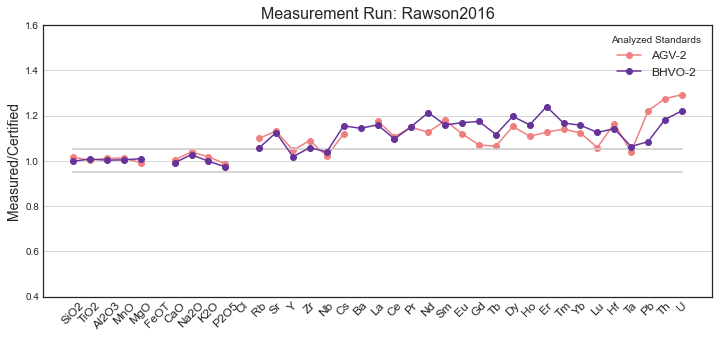

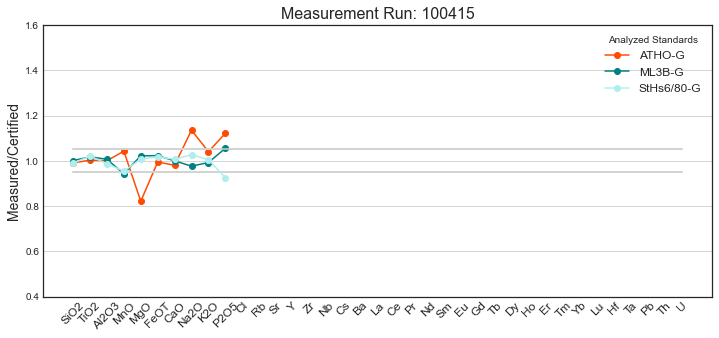

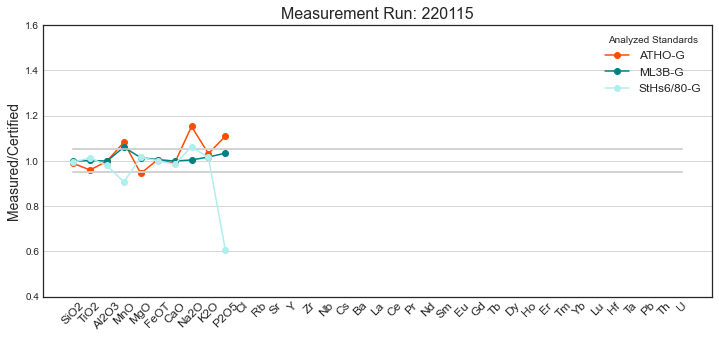

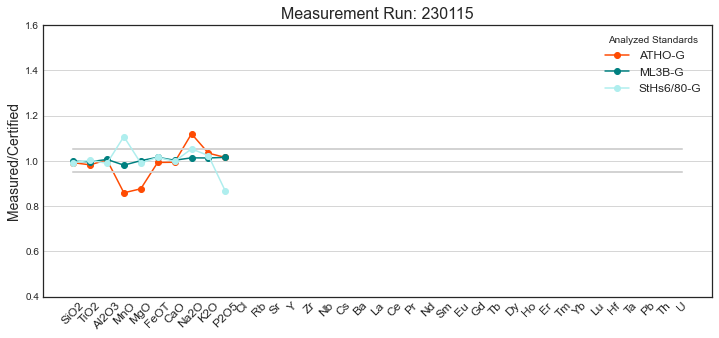

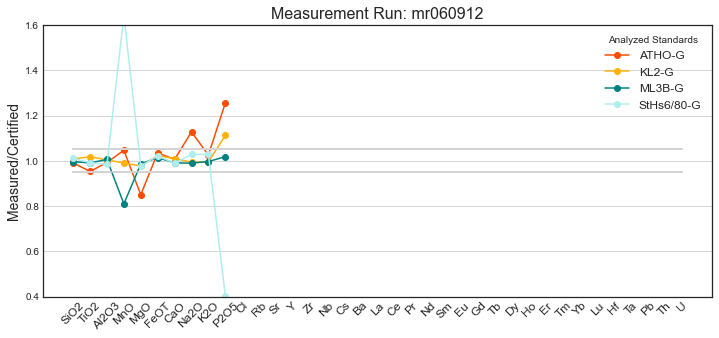

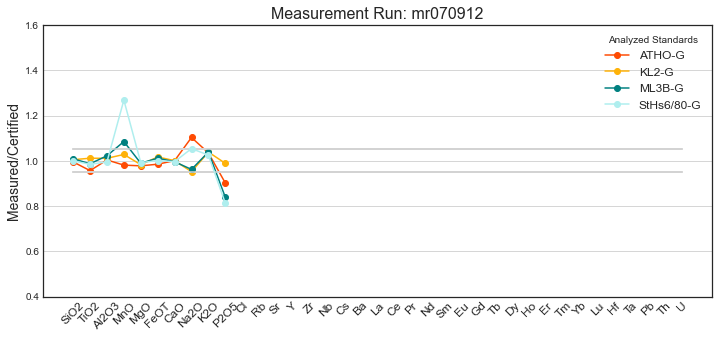

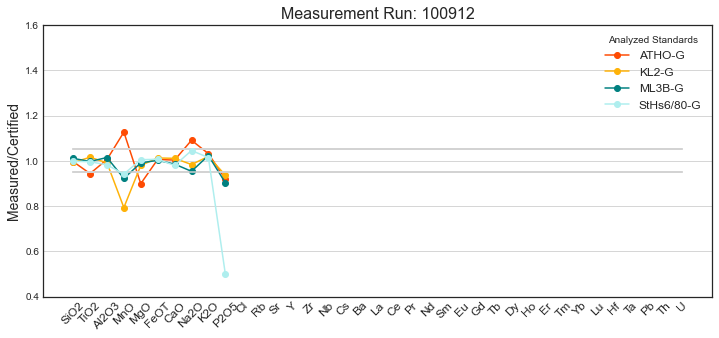

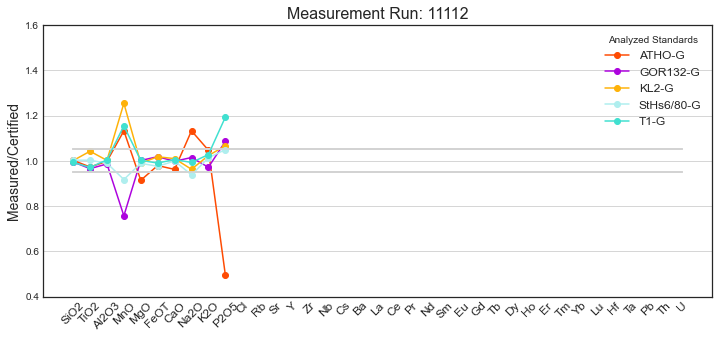

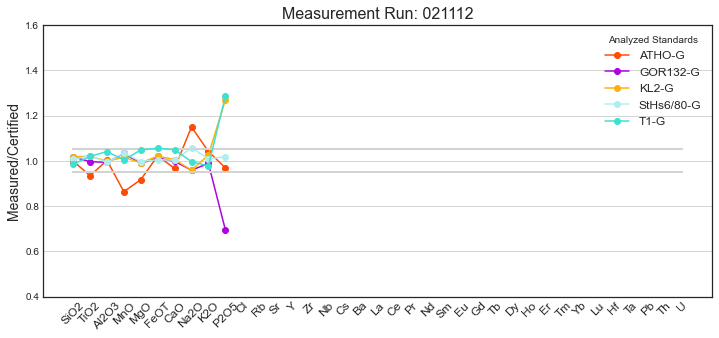

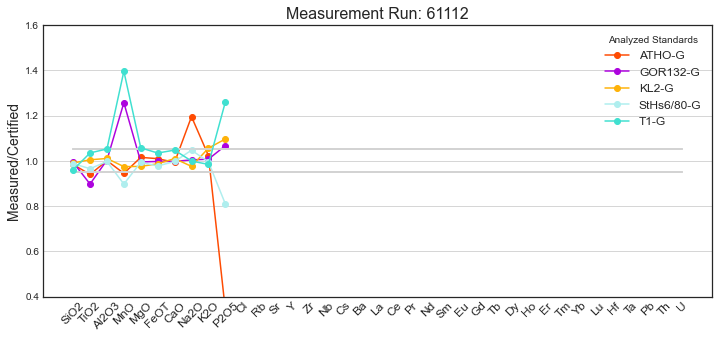

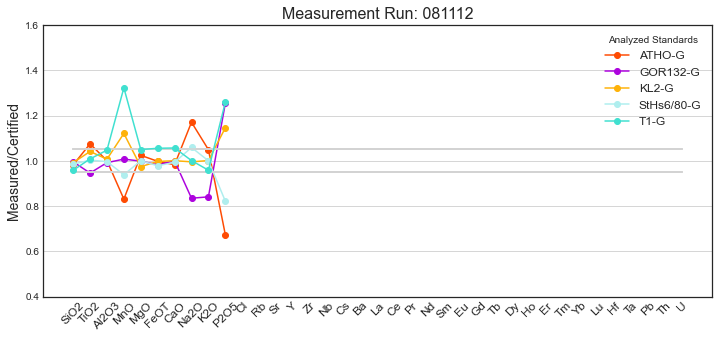

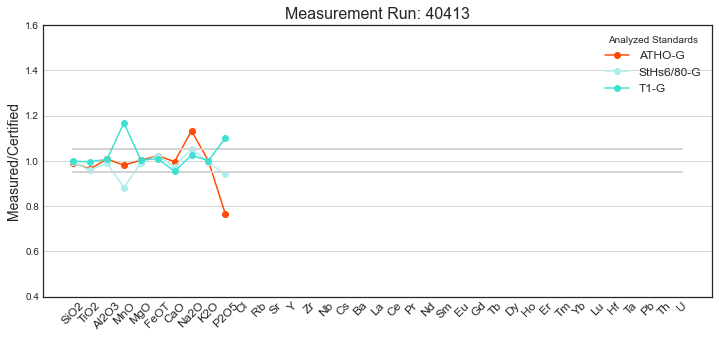

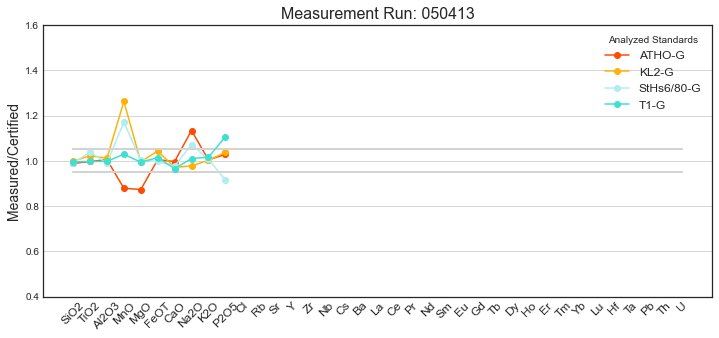

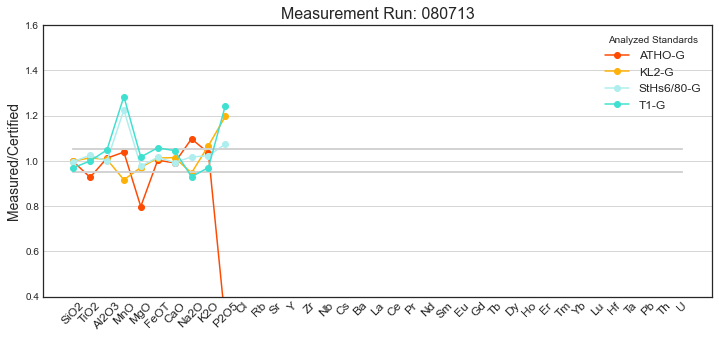

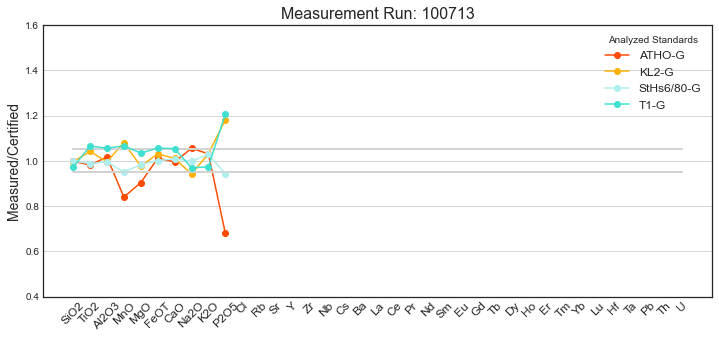

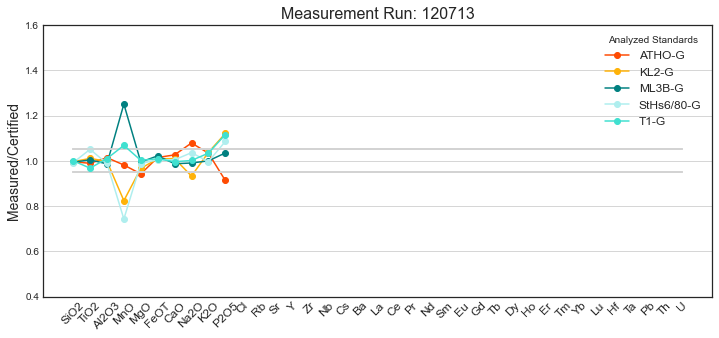

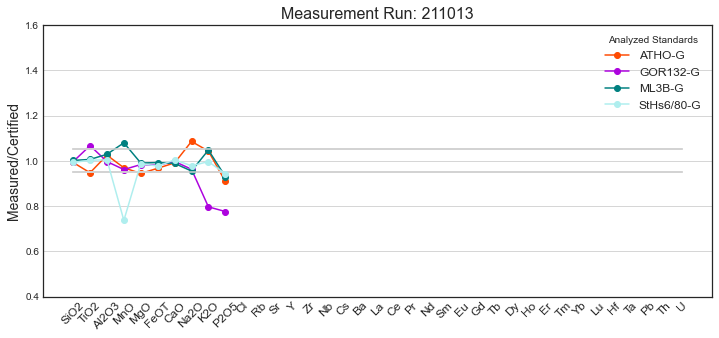

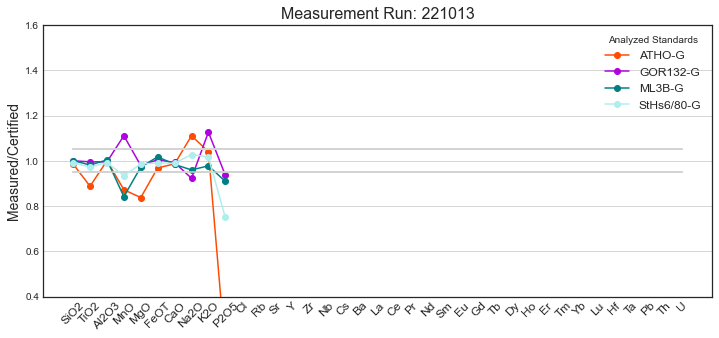

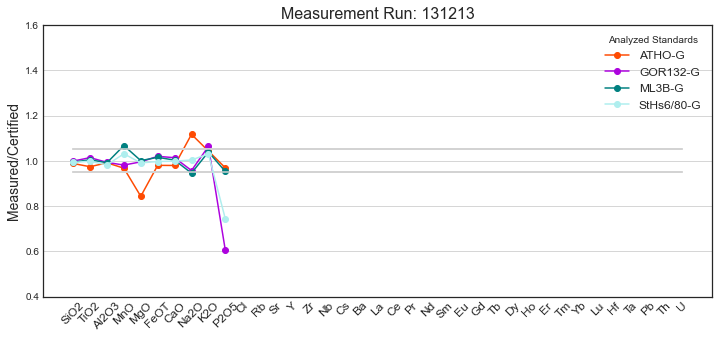

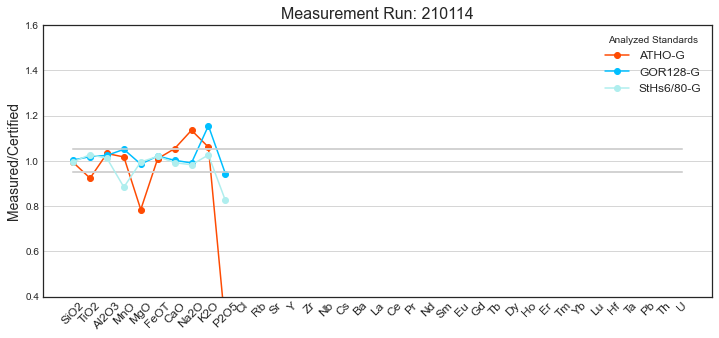

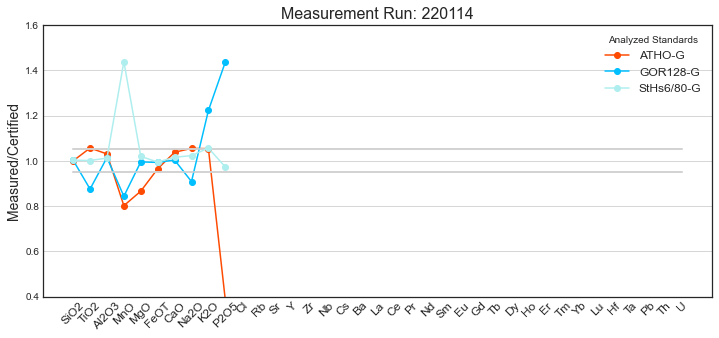

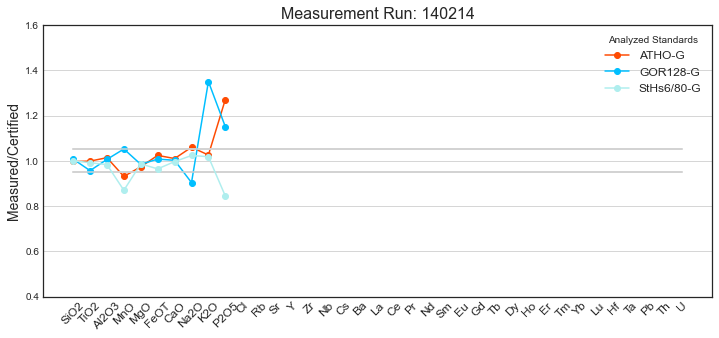

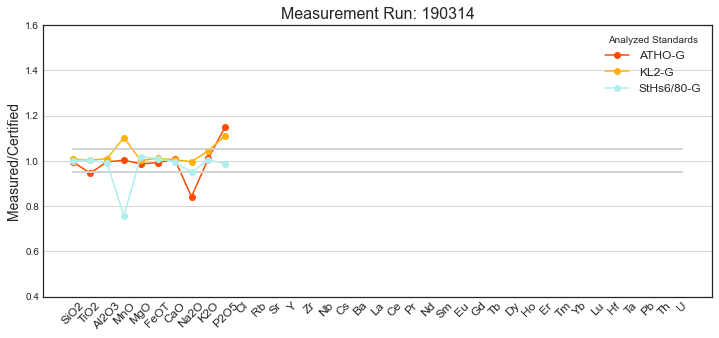

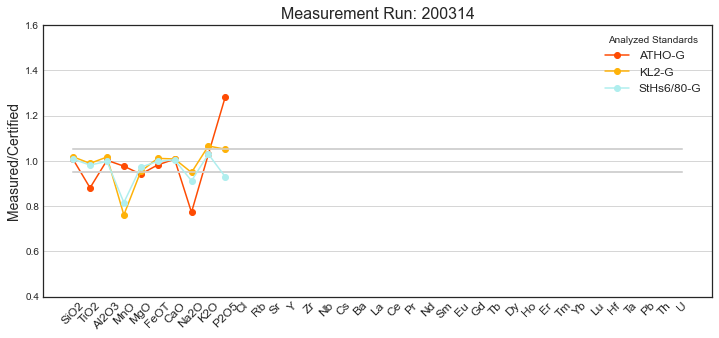

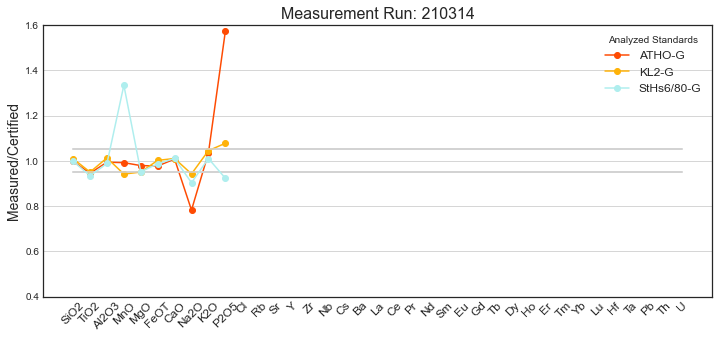

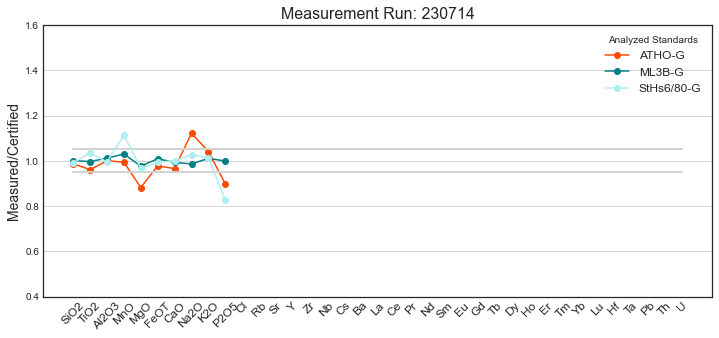

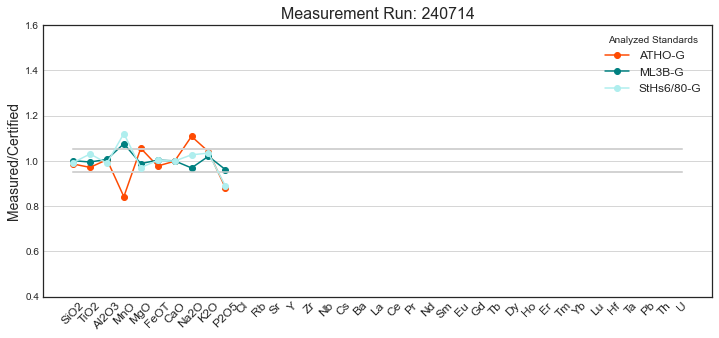

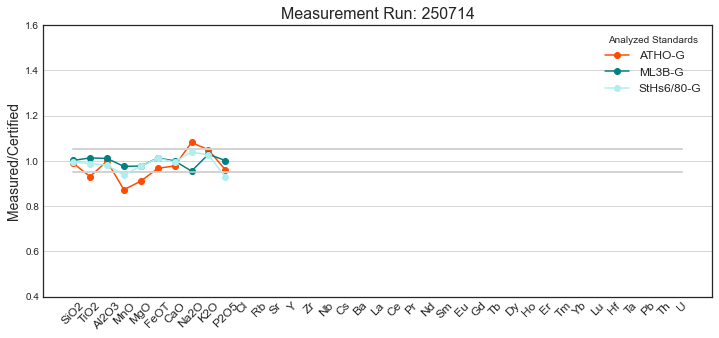

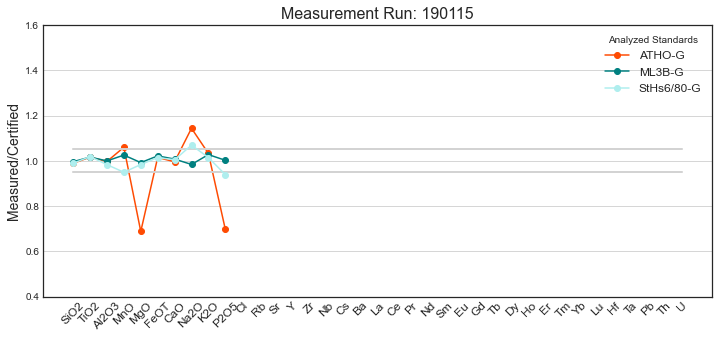

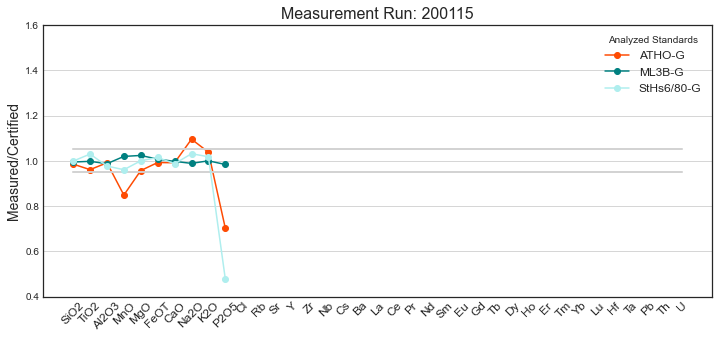

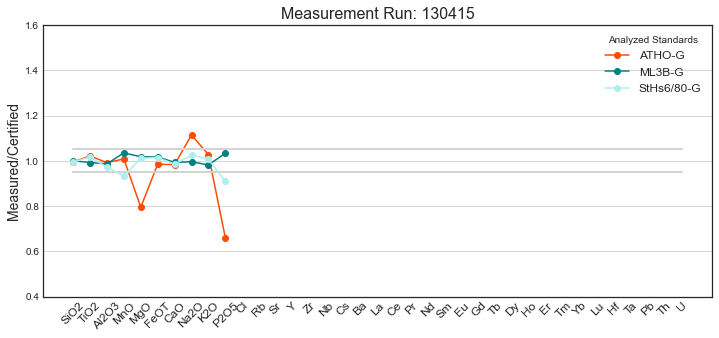

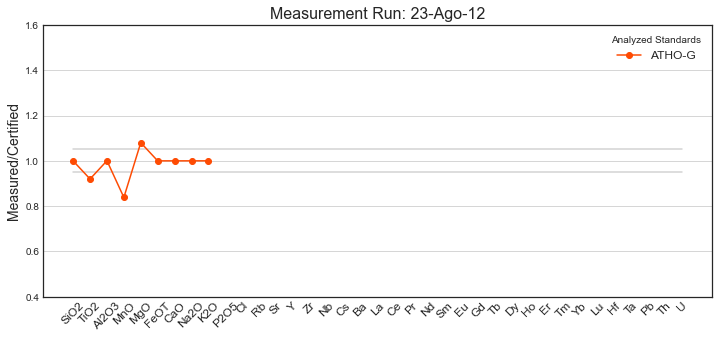

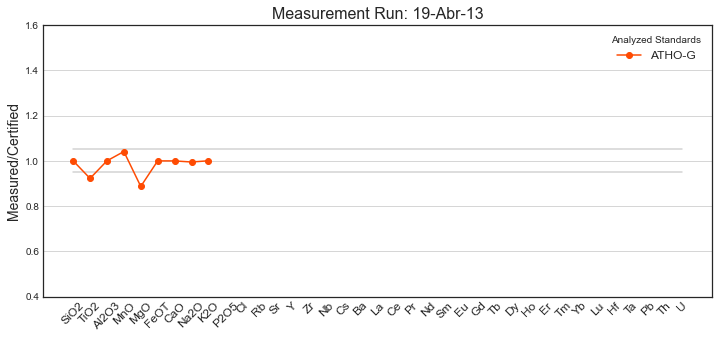

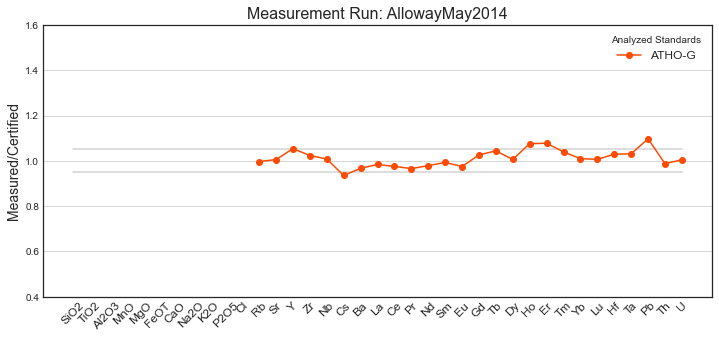

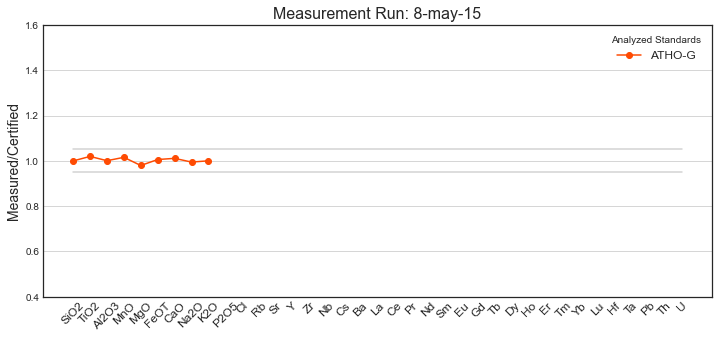

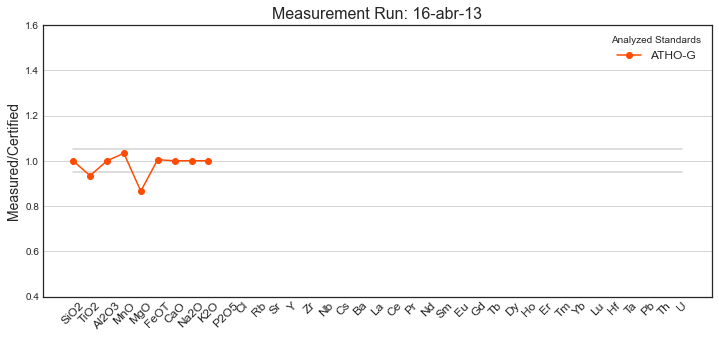

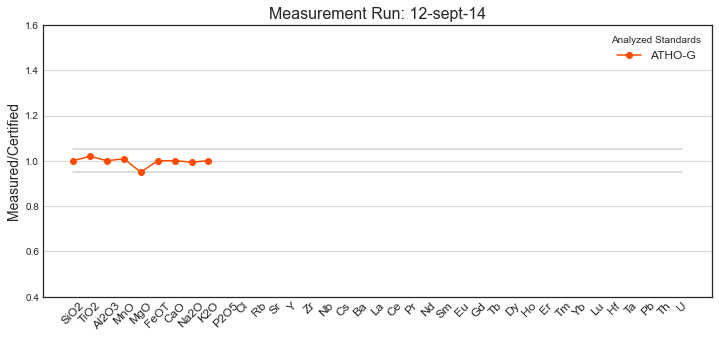

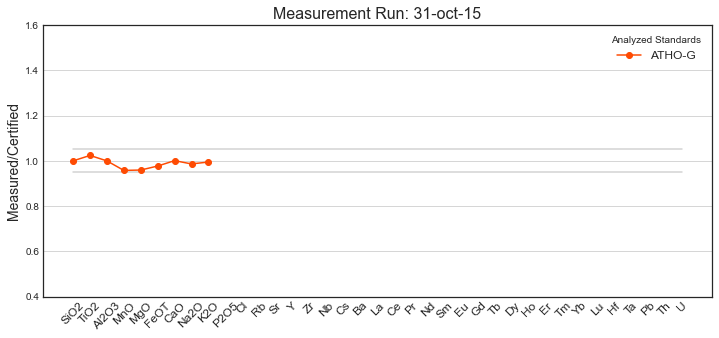

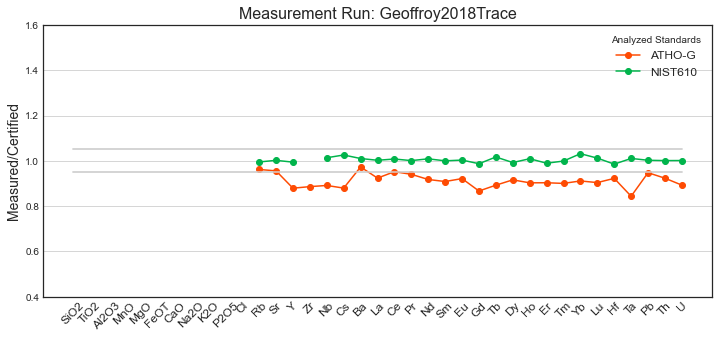

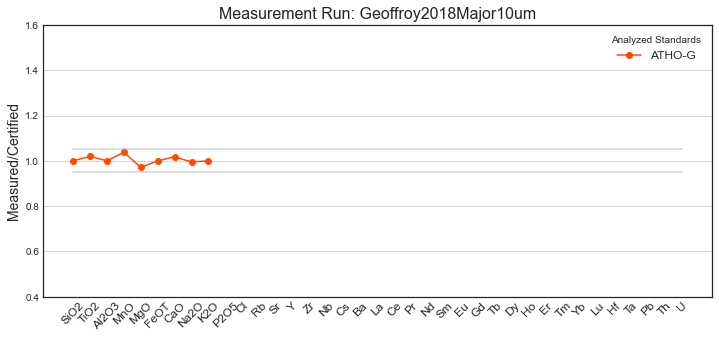

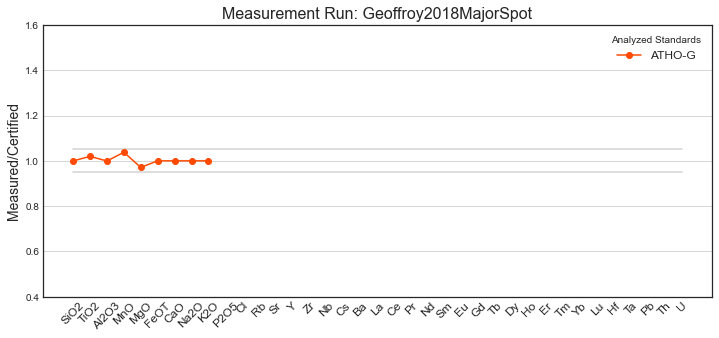

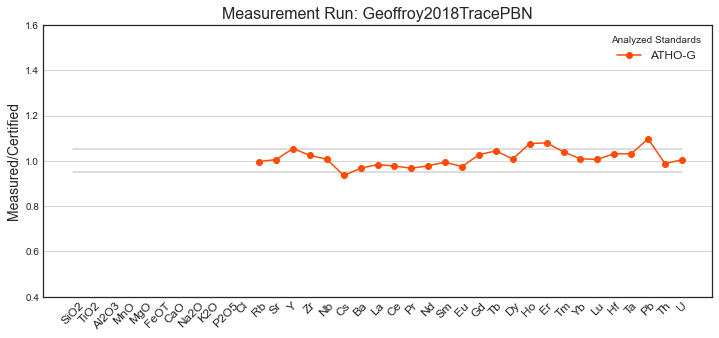

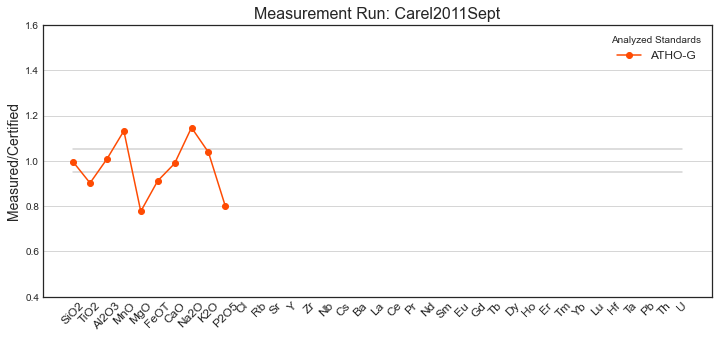

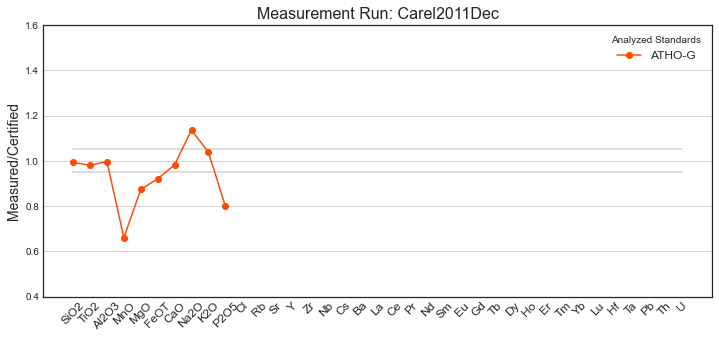

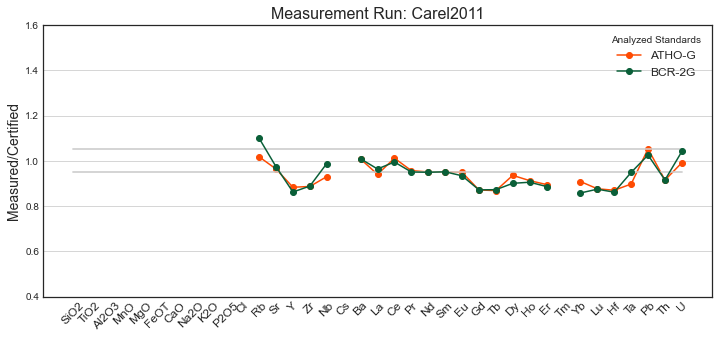

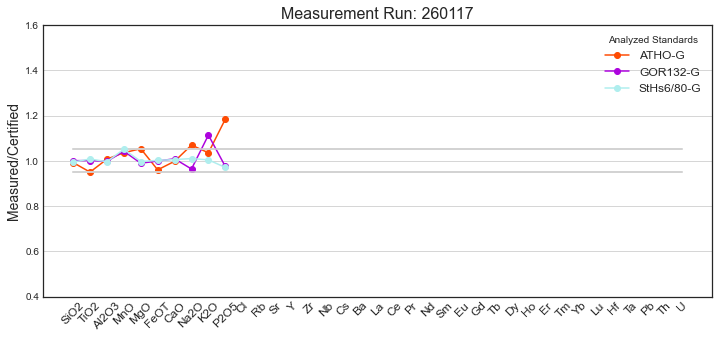

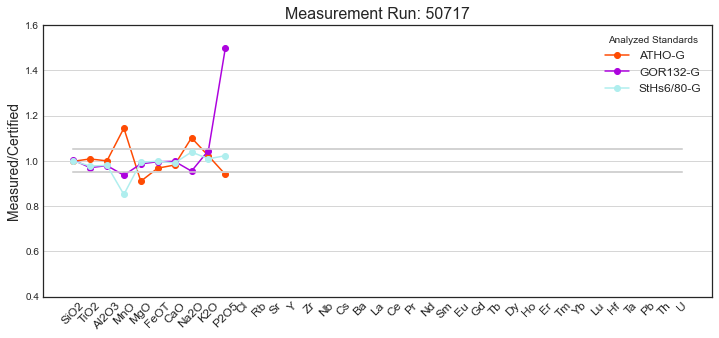

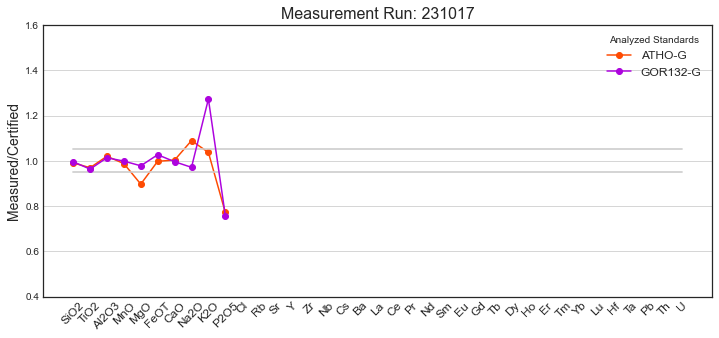

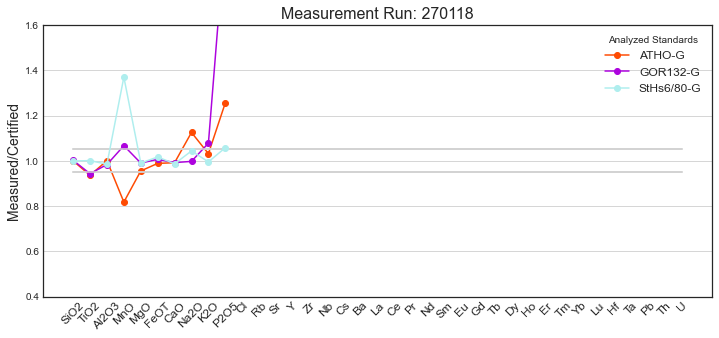

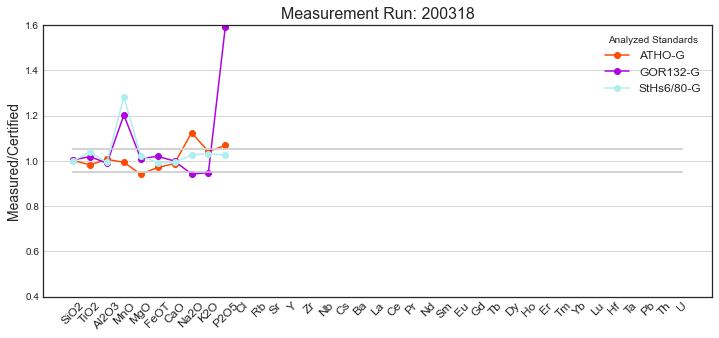

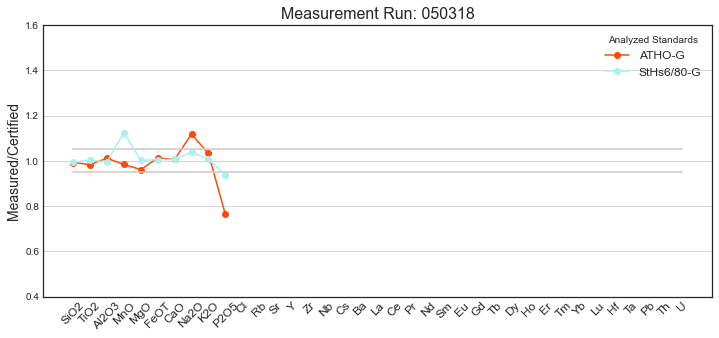

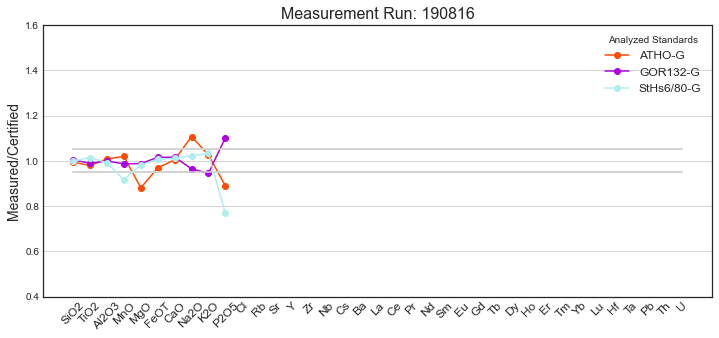

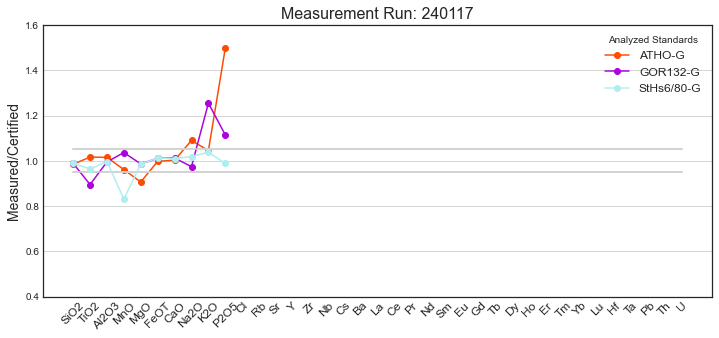

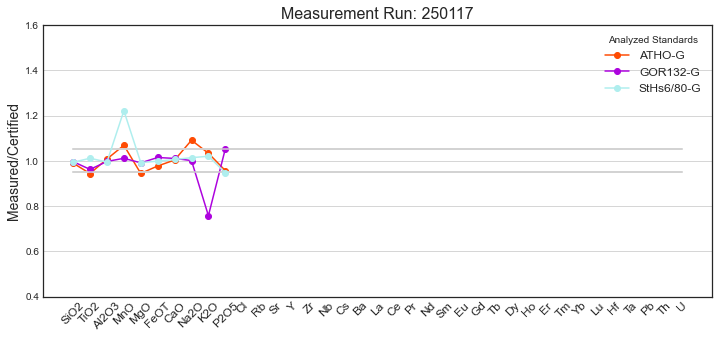

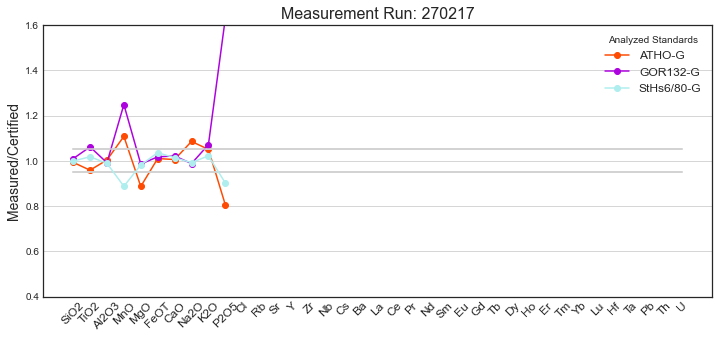

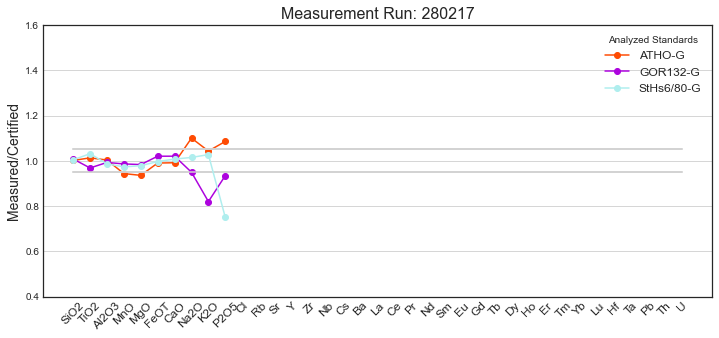

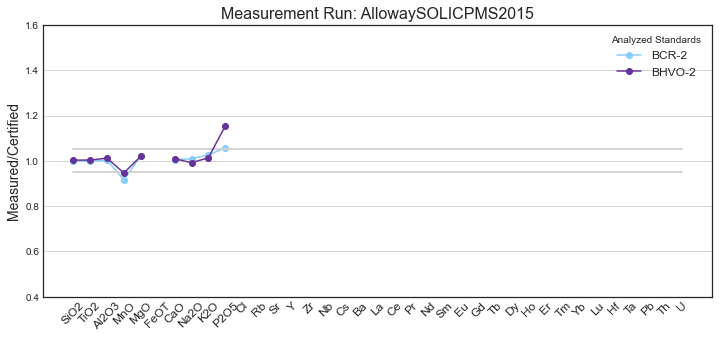

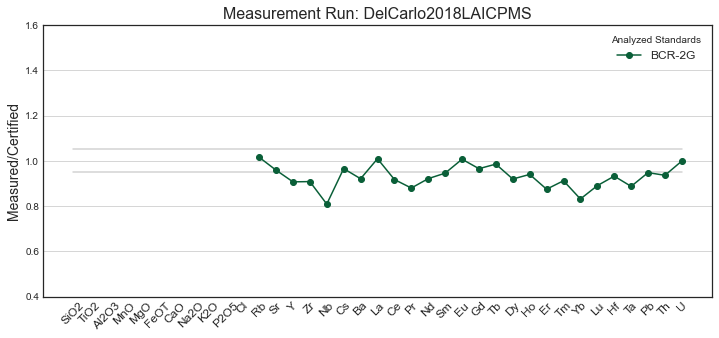

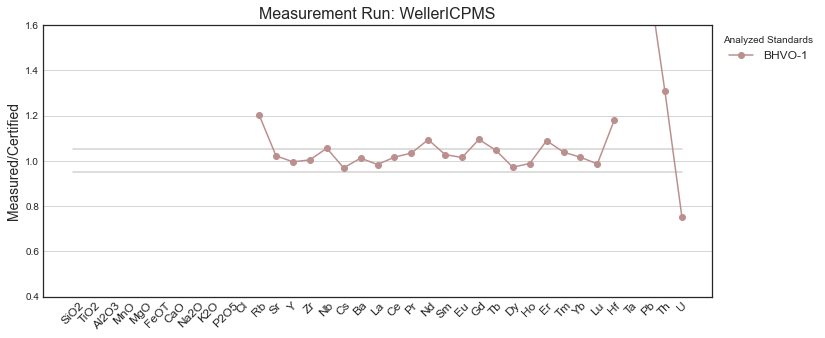

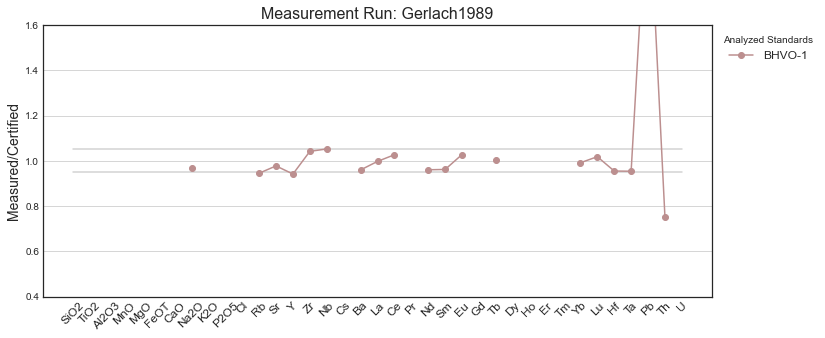

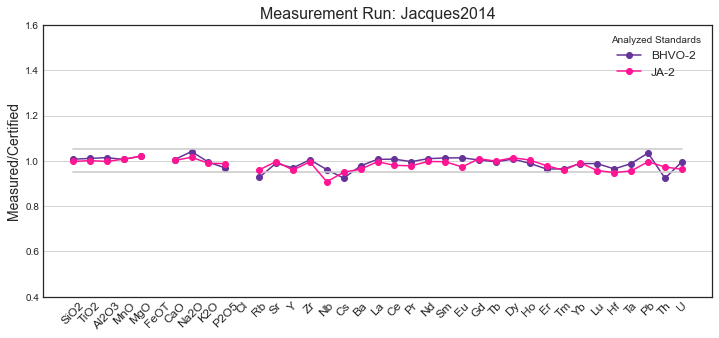

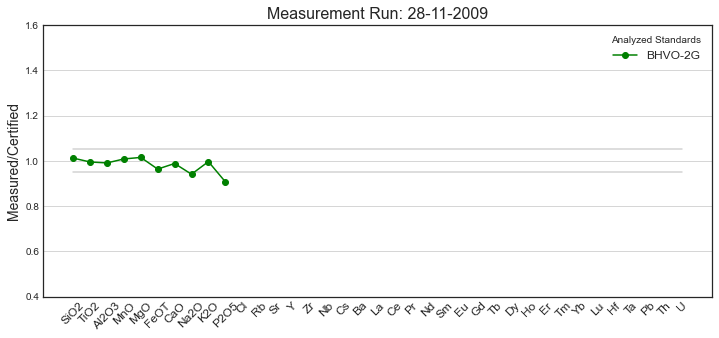

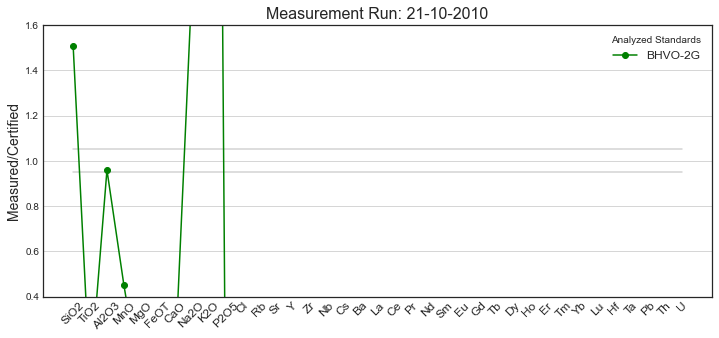

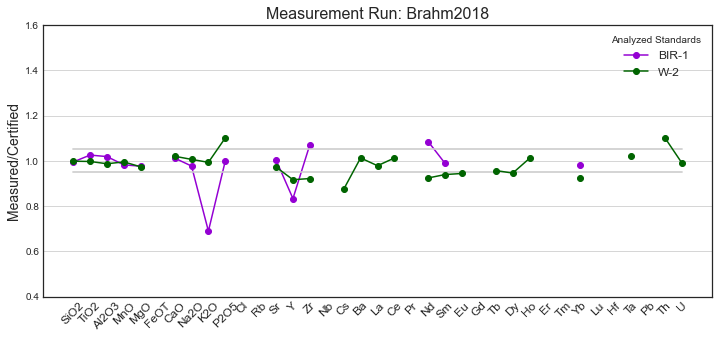

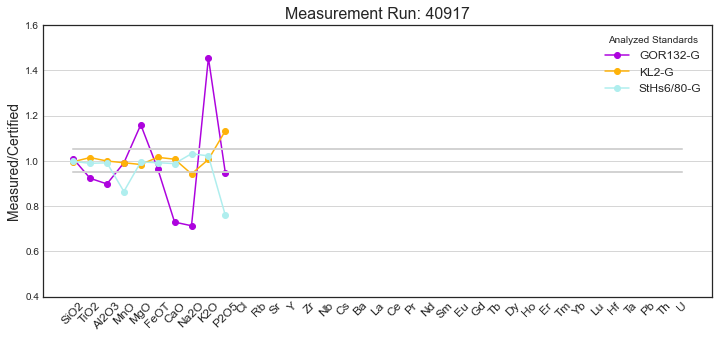

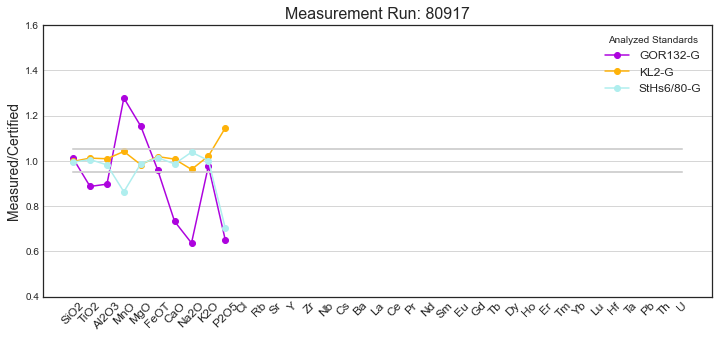

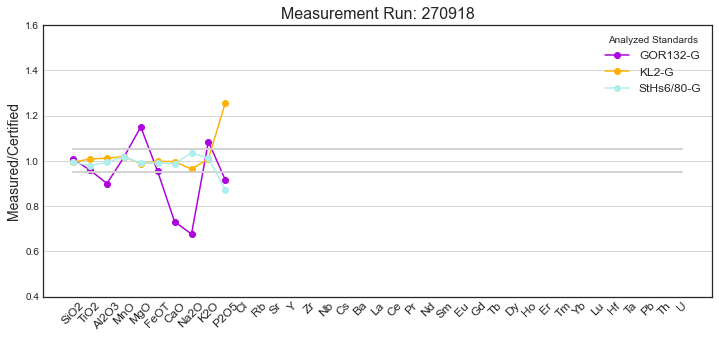

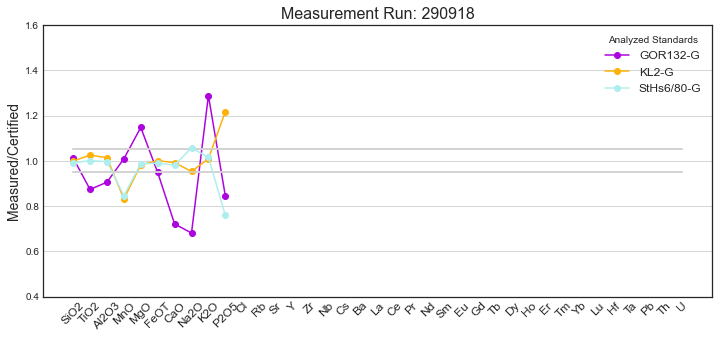

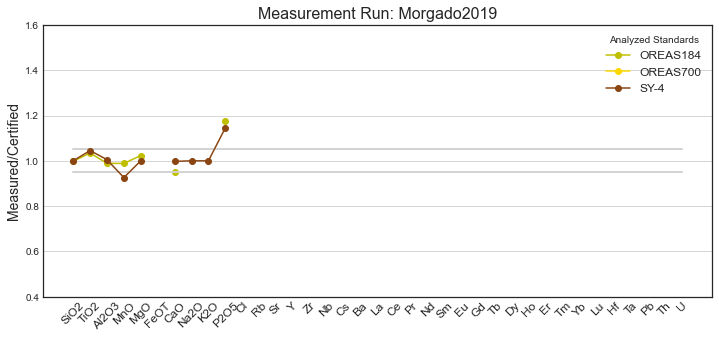

In [135]:
graficar_Acc(MeasuredVsRef)

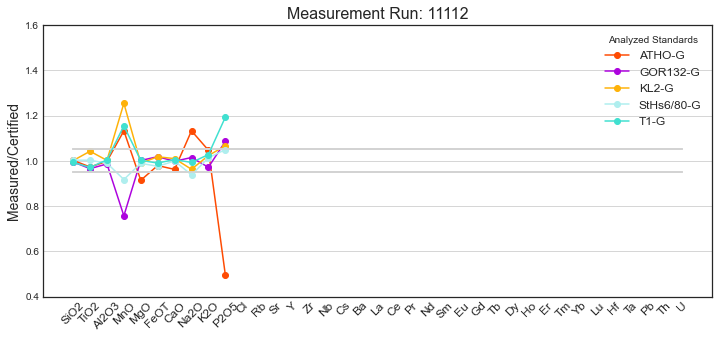

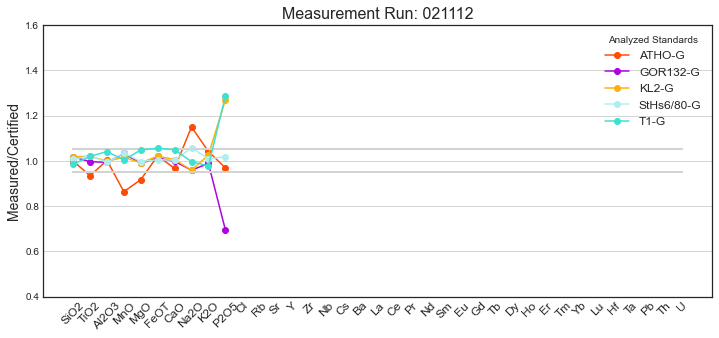

In [136]:
#if you want to check some specific Measurement run you can do the following, adding as many specific runs you want:
graficar_Acc(MeasuredVsRef[MeasuredVsRef.MeasurementRun.isin(['11112','021112'])])

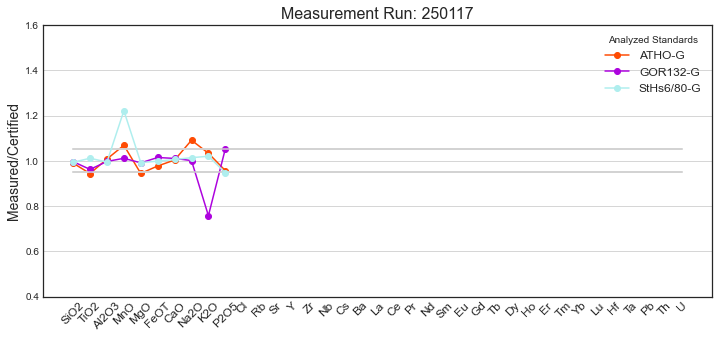

In [137]:
#if you want to check for a specific sample:
graficar_Acc(MeasuredVsRef[MeasuredVsRef.MeasurementRun.isin(Data[Data.SampleID == 'T-44'].MeasurementRun.unique())])
#if no certified secondarystandards have been analyzed along ith the sample nothing ill be plotted
graficar_Acc(MeasuredVsRef[MeasuredVsRef.MeasurementRun.isin(Data[Data.SampleID == 'JK193'].MeasurementRun.unique())])

In [29]:
# Plot the accuracy for all the elements analyzed for each Standards in each MeasurementRun grafico
def graficar_Acc_todos(Accuracy_data):

    # Here we choose which set of elements we want to analyze
    elementos = ['SiO2','TiO2','Al2O3','MnO','MgO','FeOT','CaO','Na2O','K2O','P2O5','Cl','Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']
    #elementos = ['SiO2','TiO2','Al2O3','MnO','MgO','FeOT','CaO','Na2O','K2O','P2O5']
    linea1 = np.empty(len(elementos))
    linea1.fill(1.05)
    linea2 = np.empty(len(elementos))
    linea2.fill(0.95)
    Accuracy_data = Accuracy_data.sort_values(by=['Standard'])
    plt.figure(figsize=(12,5))
    ax = plt.axes()        

    for std in Accuracy_data.Standard.unique():
        temp = Accuracy_data[Accuracy_data.Standard==std]
        #print(std)
        #print(len(temp))
        Color = simbología_std(std)
        if len(temp.SiO2) > 3:
            for elemento in elementos:
                #print(elemento)
                temp2 = temp.dropna(axis = 'rows',subset=([elemento]))
                temp2 = temp2.reset_index(drop=True)
                index2 = temp2.first_valid_index()
                if temp2[elemento].notnull().sum()>1:
                    ax.vlines(elemento,temp2[elemento].mean()-temp2[elemento].std(),temp2[elemento].mean()+temp2[elemento].std(),colors=Color,linewidth=3.5)
            ax.vlines(elemento,temp2[elemento].mean()-temp2[elemento].std(),temp2[elemento].mean()+temp2[elemento].std(),colors=Color,linewidth=3.5,label = std +' (' + str(len(temp))+' MRs)')
        
        if len(temp.SiO2) <= 3:
            plt.plot(elementos, temp[elementos].iloc[0,:],marker = 'o',linestyle='None',ms=4,color = Color,label = std)    
    
    plt.plot(elementos, linea1,color = 'grey')
    plt.plot(elementos, linea2,color = 'grey')            
    leg=plt.legend(fancybox=True, bbox_to_anchor=(1,1.1),ncol=1,fontsize=13, title="Analyzed Standards")
    plt.ylim(0.5,1.5)
    ax.tick_params(labelsize = 15,direction='in',axis='x',rotation=75)
    ax.tick_params(labelsize = 15,direction='in',axis='y')
    plt.ylabel("Analyzed/Certified: Accuracy", fontsize = 16)
    ax.grid(axis ='y')
    plt.savefig('../Plots/Accuracy.pdf',dpi = 300,bbox_inches='tight')#,bbox_extra_artists=(leg,)
    plt.show()

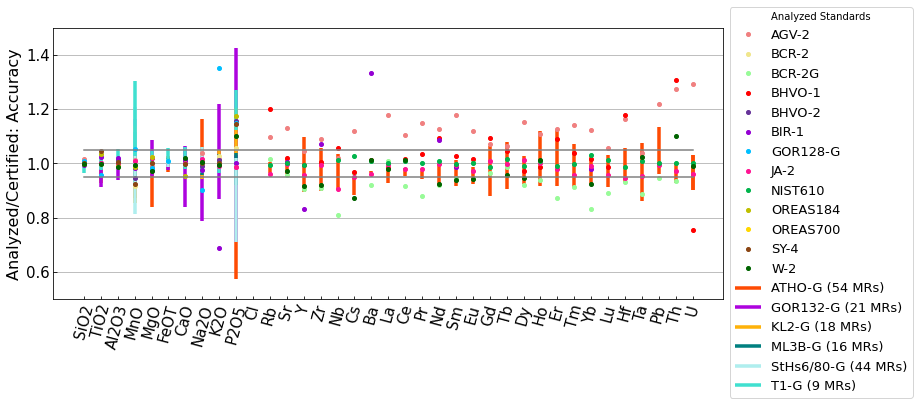

In [36]:
graficar_Acc_todos(MeasuredVsRef)

In [77]:
print('\033[1m'+ 'Accuracies'+ '\033[0m')
print(" ")

for elemento in ['SiO2','TiO2','Al2O3','MnO','MgO','FeOT','CaO','Na2O','K2O','P2O5','Cl',
                             'Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb',
                             'Dy','Ho','Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']:
    print('\033[1m'+ elemento + '\033[0m')
    print('Min: {}, Max: {}, Mean: {}, STD: {}'.format(MeasuredVsRef[elemento].min(),MeasuredVsRef[elemento].max(),MeasuredVsRef[elemento].mean(),MeasuredVsRef[elemento].std()))
    print(" ")      

Accuracies
 
SiO2
Min: 0.9581672354948807, Max: 1.017973626373626, Mean: 0.9968397192892239, STD: 0.00841094861018302
 
TiO2
Min: 0.8737291212781411, Max: 1.074901960784314, Mean: 0.9895618467688586, STD: 0.03862123493134493
 
Al2O3
Min: 0.897009090909091, Max: 1.055993177387914, Mean: 0.9989989151738071, STD: 0.02044230394031905
 
MnO
Min: 0.6603773584905661, Max: 1.642105263157895, Mean: 1.0080795330989376, STD: 0.14211745777663384
 
MgO
Min: 0.6882524271844661, Max: 1.159285714285714, Mean: 0.9745640123343727, STD: 0.06227391347471578
 
FeOT
Min: 0.9113149847094801, Max: 1.057340838509317, Mean: 1.0017853345062615, STD: 0.021737519874320824
 
CaO
Min: 0.7215095332018411, Max: 1.056713615023474, Mean: 0.9934762895872672, STD: 0.04391907659184198
 
Na2O
Min: 0.6371084337349399, Max: 1.19496, Mean: 1.0094393397610921, STD: 0.08642464762143857
 
K2O
Min: 0.689655172413793, Max: 1.454545454545455, Mean: 1.0247013274827068, STD: 0.07481099498068522
 
P2O5
Min: 0.159, Max: 2.00833333333333

In [10]:
###### Plot the presicion for all the elements analyzed for each Standards in each MeasurementRun
def graficar_RSD(TDB_standards):

    #first filter the data for which n, SD and thus RSD have not been reported:
    TDB_standards = TDB_standards[TDB_standards.n != 'Not reported']
    
    elementos = [ 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Cl', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd','Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']
#    elementos = ['SiO2','TiO2','Al2O3','MnO','MgO','FeO*','CaO','Na2O','K2O','P2O5']
    elementos_RSD = ['RSD_SiO2','RSD_TiO2','RSD_Al2O3','RSD_FeOT','RSD_MnO','RSD_MgO','RSD_CaO','RSD_Na2O','RSD_K2O','RSD_P2O5','RSD_Cl','RSD_Rb','RSD_Sr','RSD_Y','RSD_Zr','RSD_Nb','RSD_Cs','RSD_Ba','RSD_La','RSD_Ce','RSD_Pr','RSD_Nd','RSD_Sm','RSD_Eu','RSD_Gd','RSD_Tb','RSD_Dy','RSD_Ho','RSD_Er','RSD_Tm','RSD_Yb','RSD_Lu','RSD_Hf','RSD_Ta','RSD_Pb','RSD_Th','RSD_U']
    
    linea1 = np.empty(len(elementos))
    linea1.fill(5)
    linea2 = np.empty(len(elementos))
    linea2.fill(10)

    for run in TDB_standards.MeasurementRun.unique():
        plt.figure(figsize=(12,5))
        ax = plt.axes()
        temp = TDB_standards[TDB_standards.MeasurementRun==run]
        for std in temp.Standard.unique():
            temp2 = temp[temp.Standard == std]
            temp2 = temp2.reset_index(drop=True)
            index2 = temp2.first_valid_index()
            Color = simbología_std(std)
            
            plt.plot(elementos, linea1,color = 'lightgrey')
            plt.plot(elementos, linea2,color = 'lightgrey')
            plt.plot(elementos, temp2[elementos_RSD].iloc[0,:],marker = 'o',color = Color,label = std)
        
        leg=plt.legend(fancybox=True, bbox_to_anchor=(1,1),ncol=1,fontsize=12, title="Analyzed Standards")
        plt.ylim(0,50)
        ax.set_title('Measurement Run: '+ run ,fontsize=16)
        ax.tick_params(labelsize = 13,direction='in',axis='x',rotation=45)
        ax.tick_params(labelsize = 13,direction='in',axis='y')
        plt.ylabel("RSD (%)", fontsize = 16)
        ax.grid(axis ='y')
    
        #plt.savefig('../Plots/Standards'+std+'.pdf',dpi = 300,bbox_inches='tight')#,bbox_extra_artists=(leg,)
        plt.show()
    

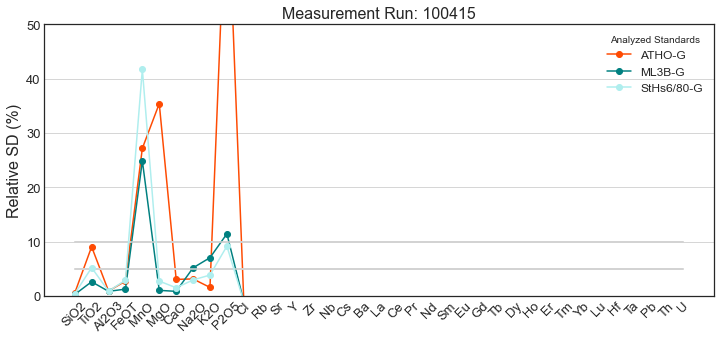

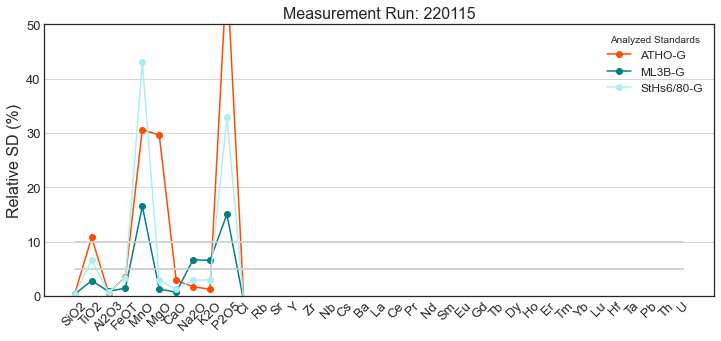

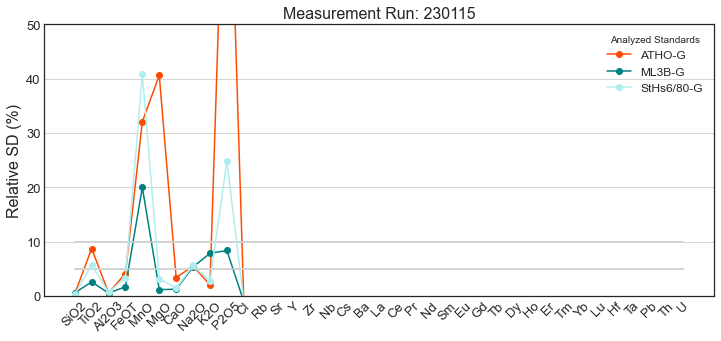

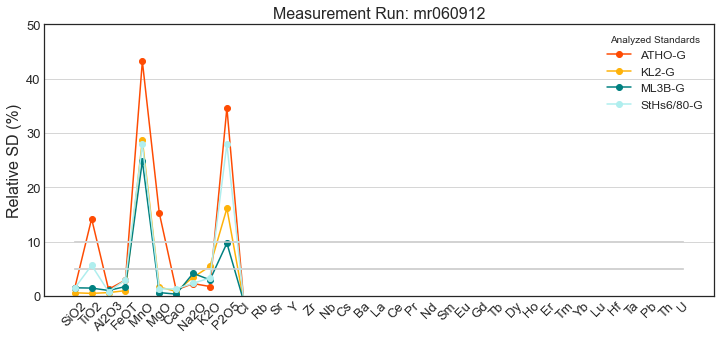

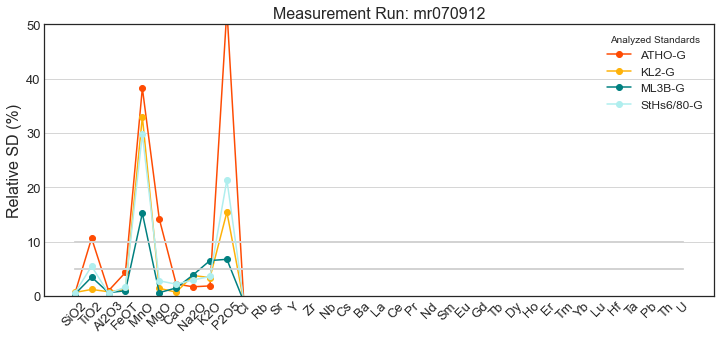

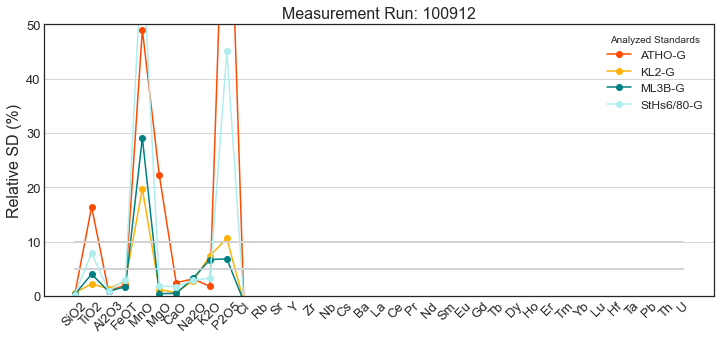

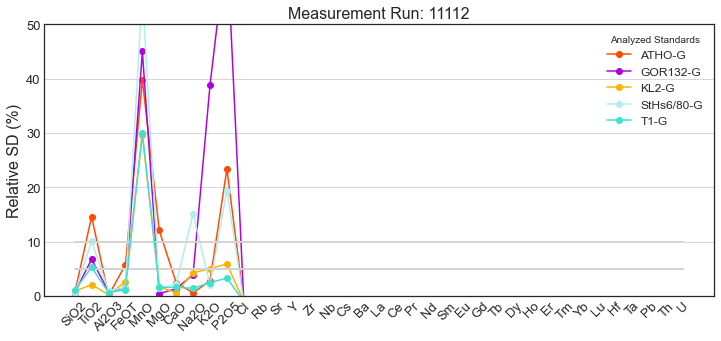

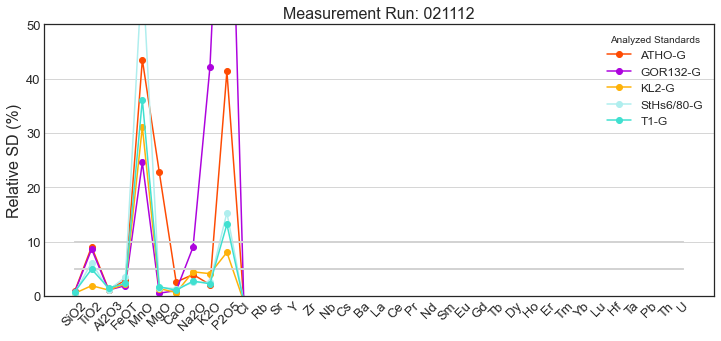

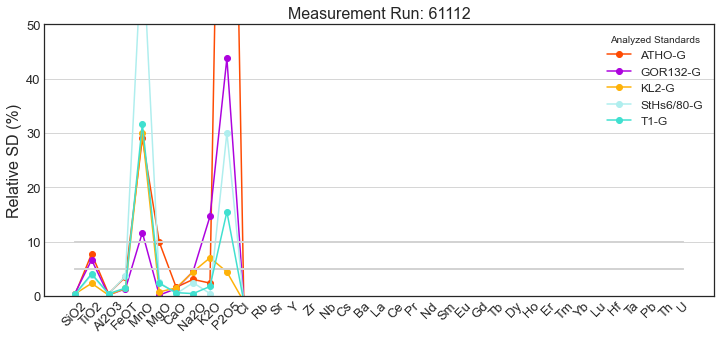

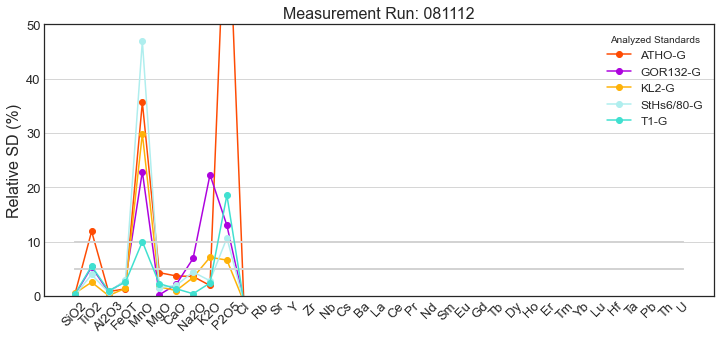

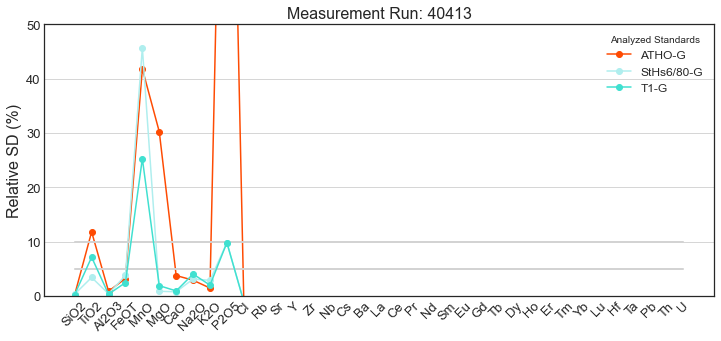

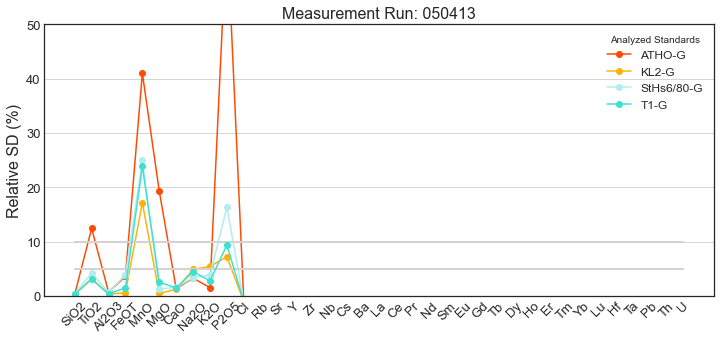

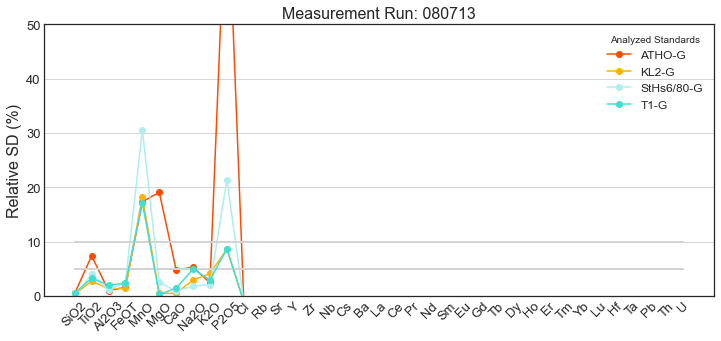

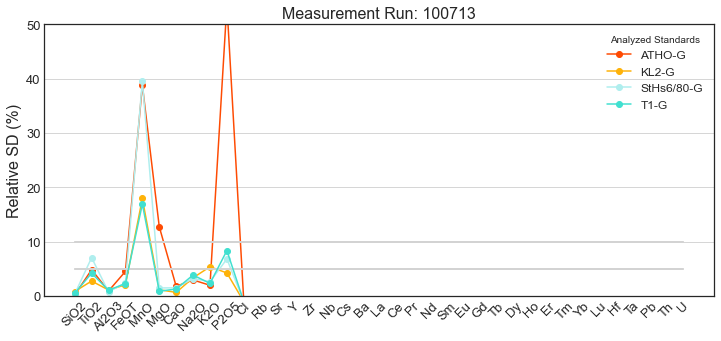

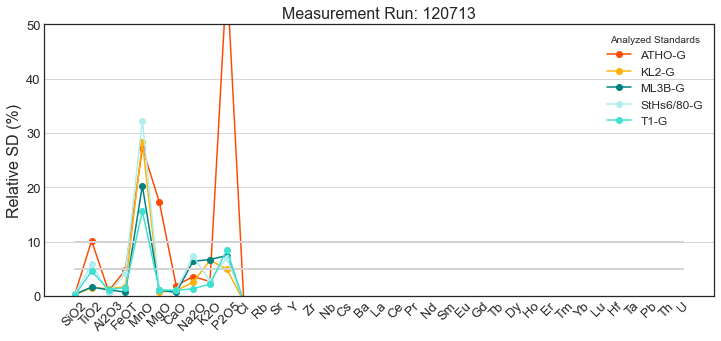

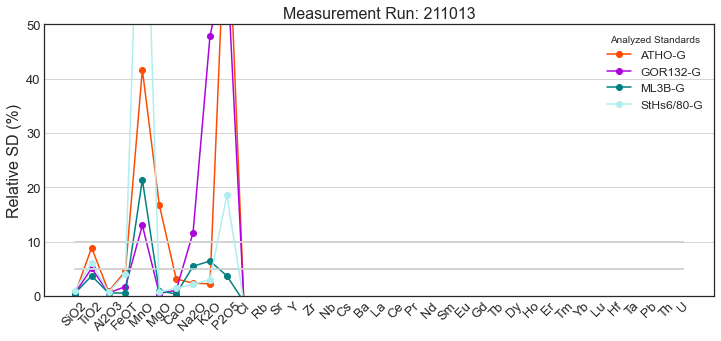

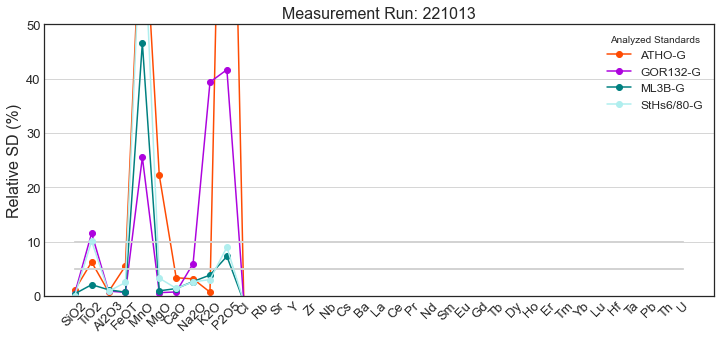

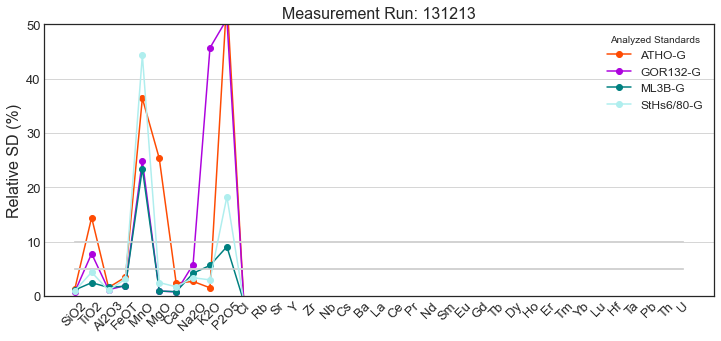

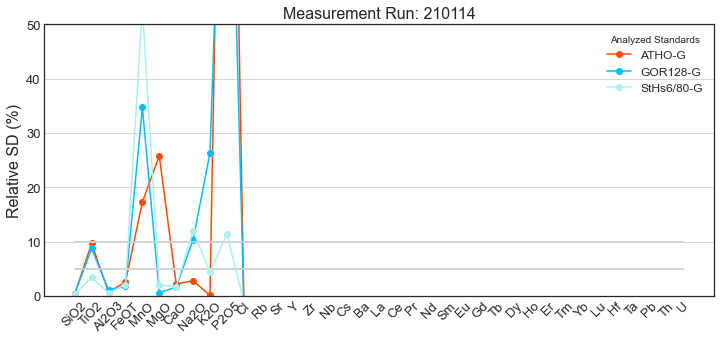

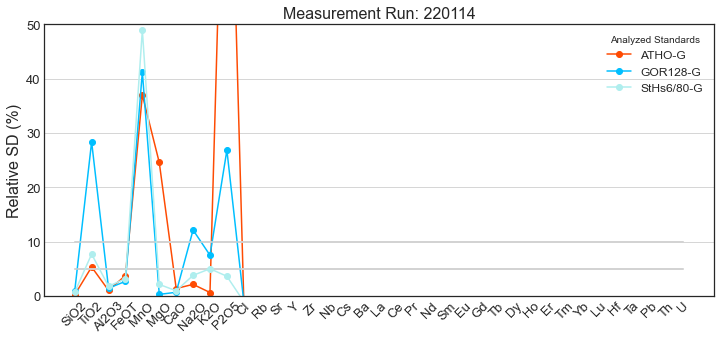

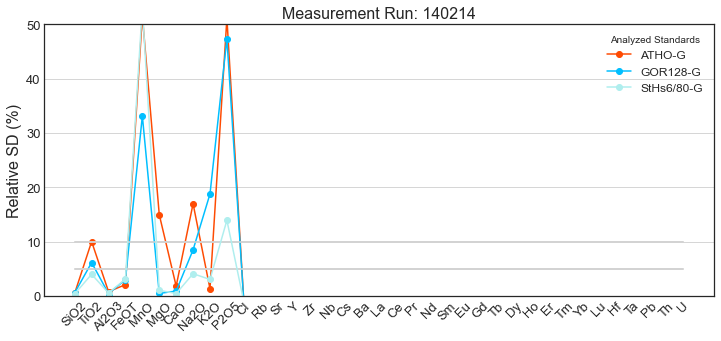

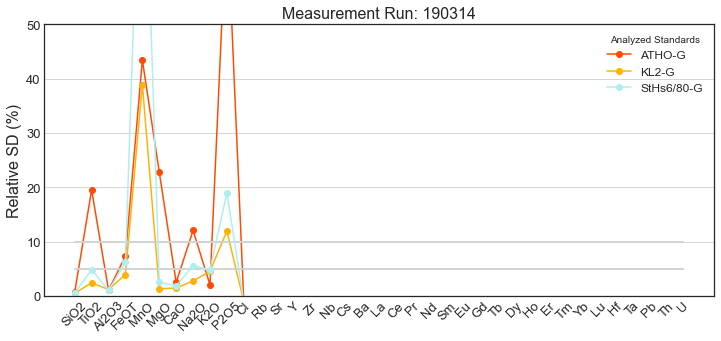

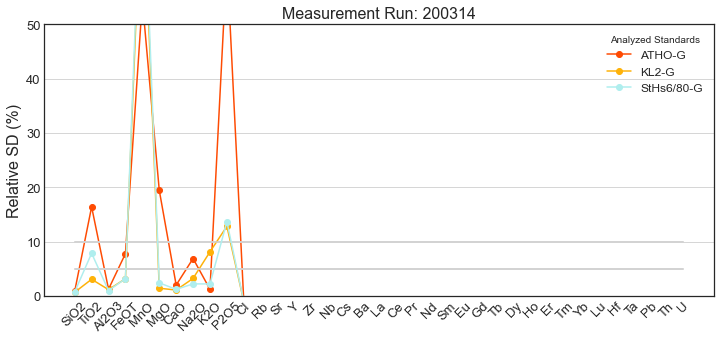

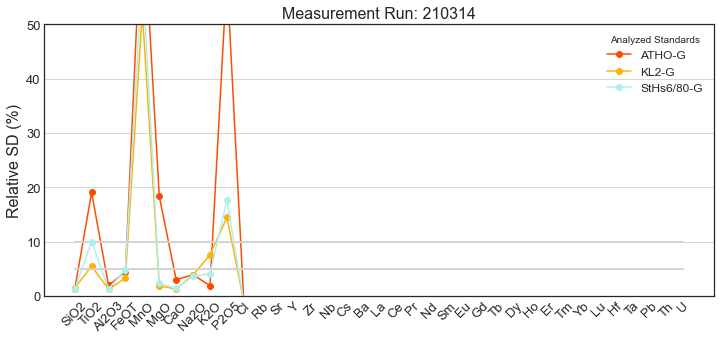

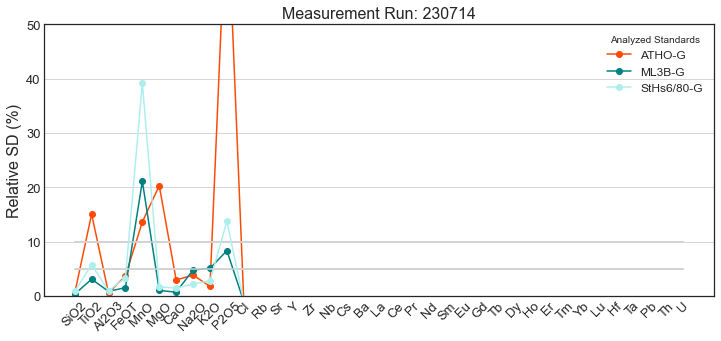

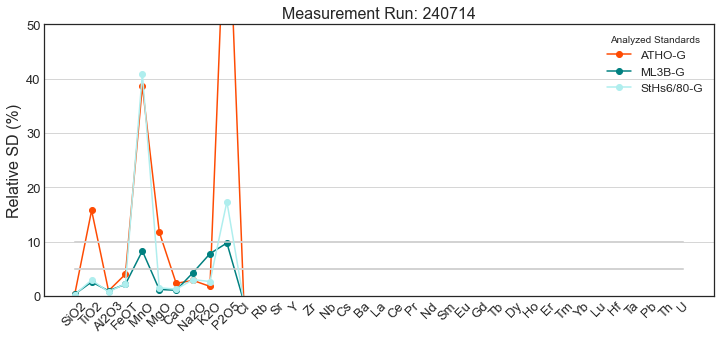

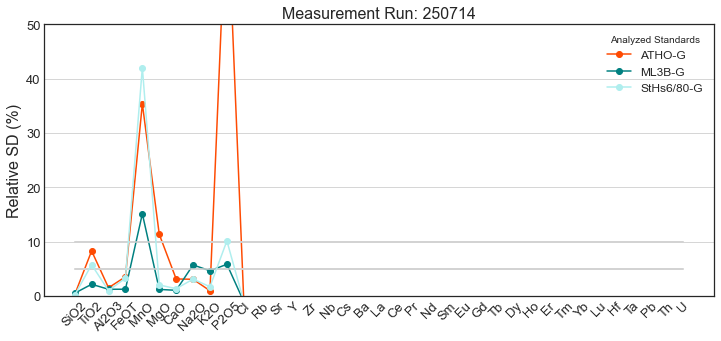

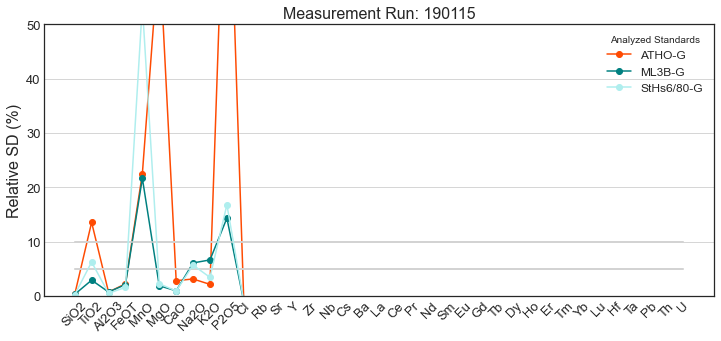

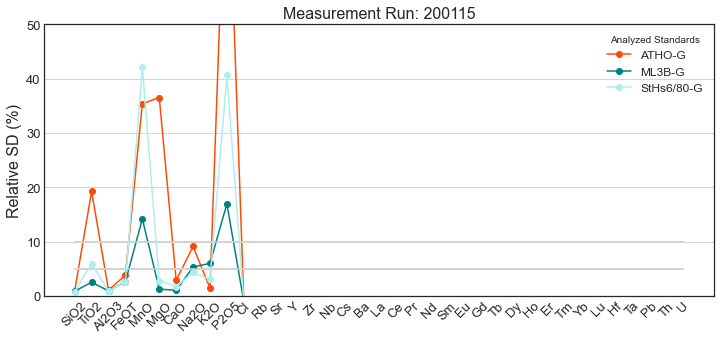

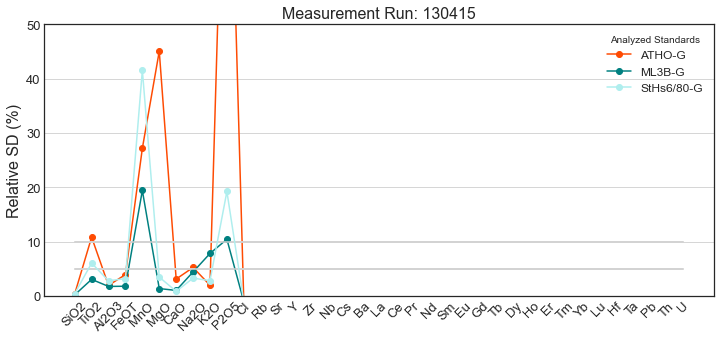

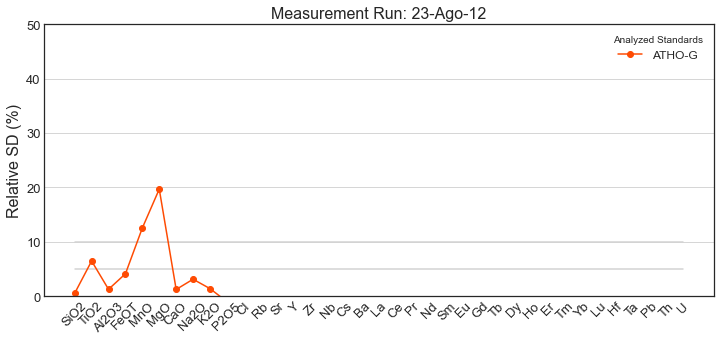

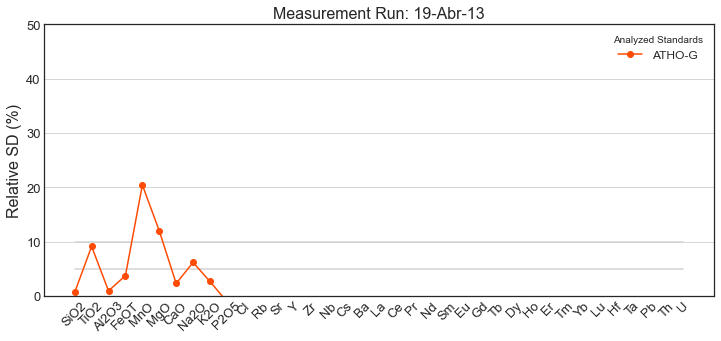

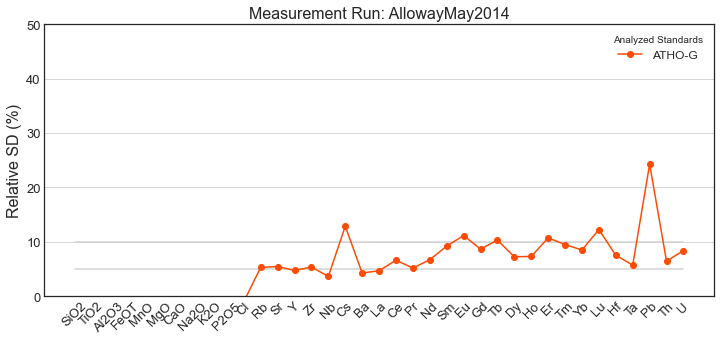

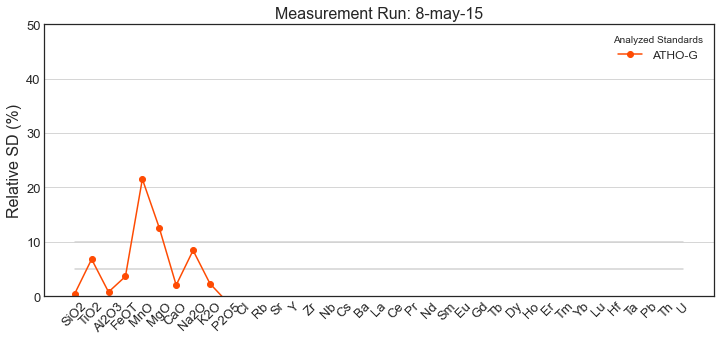

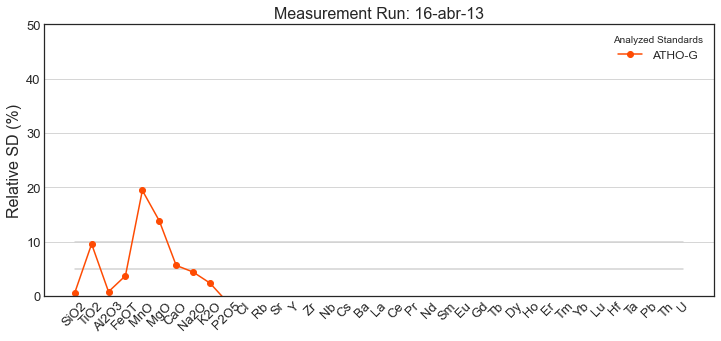

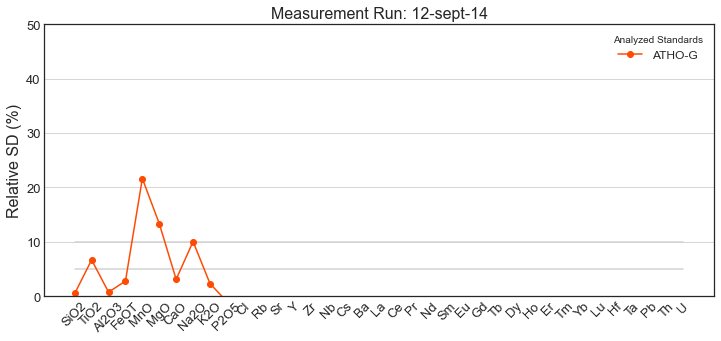

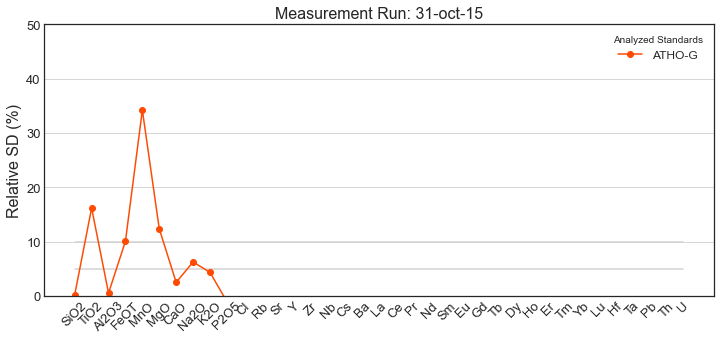

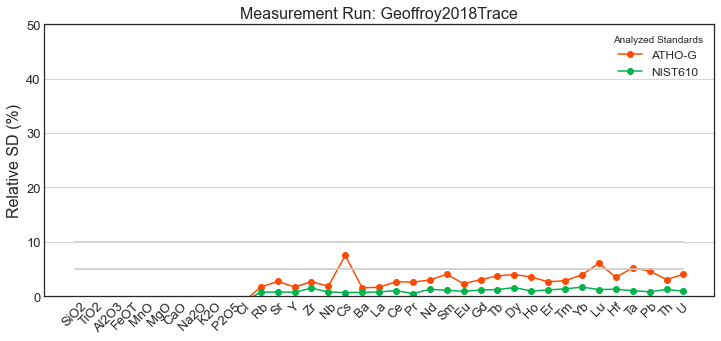

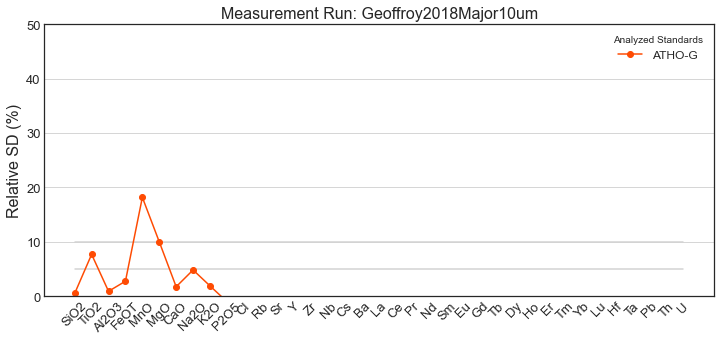

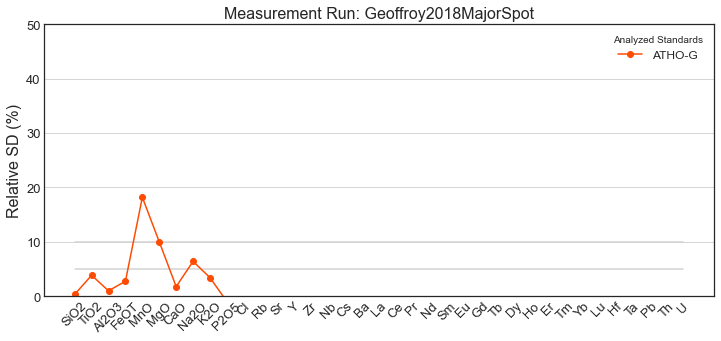

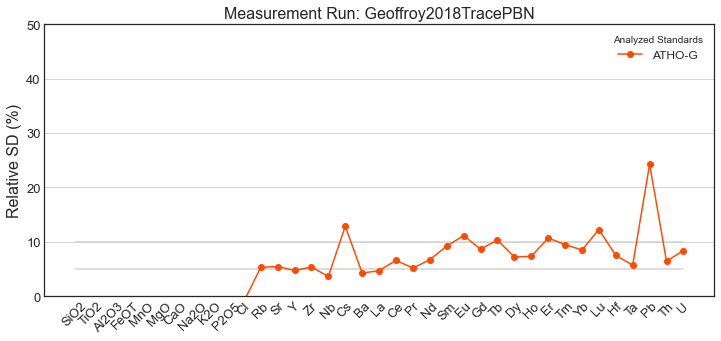

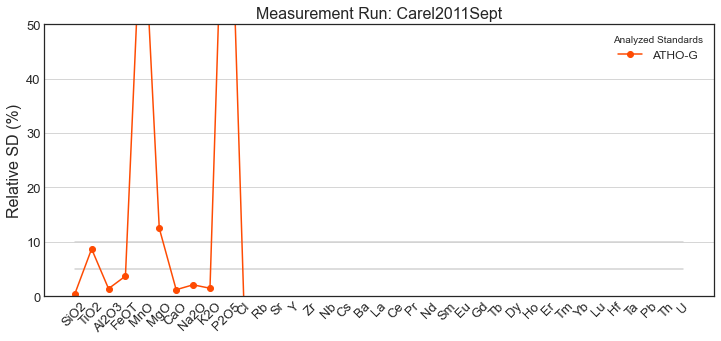

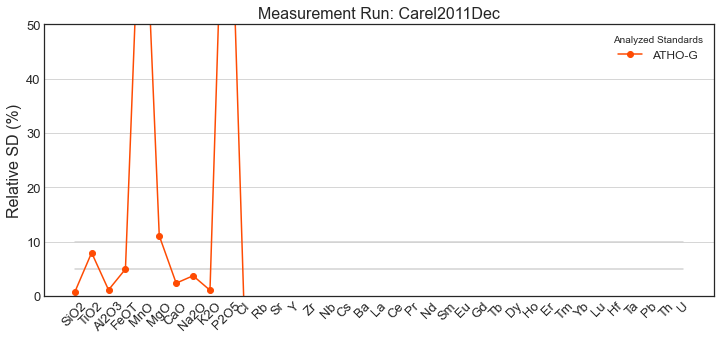

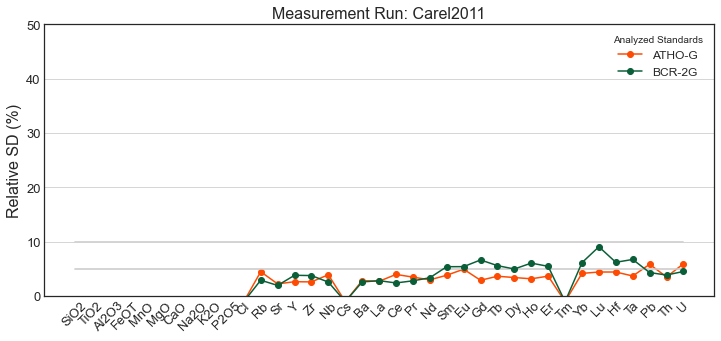

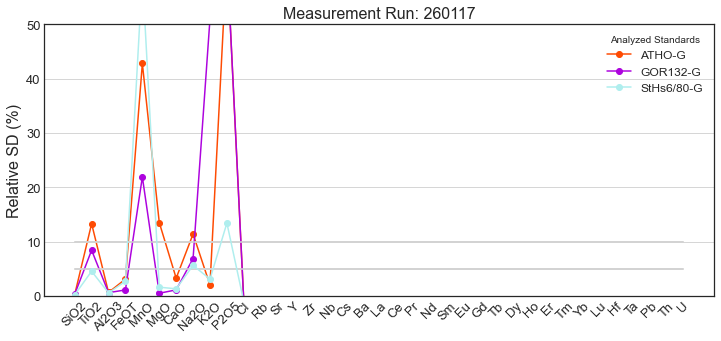

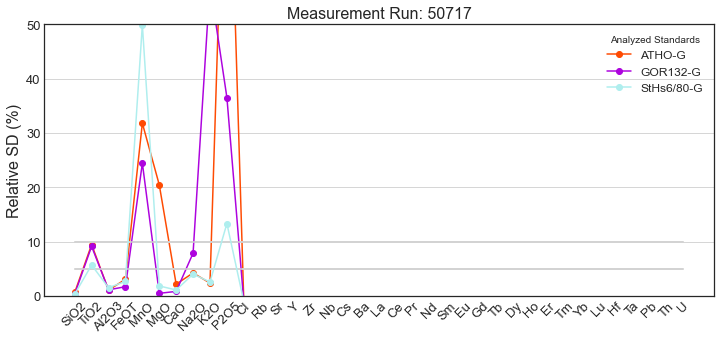

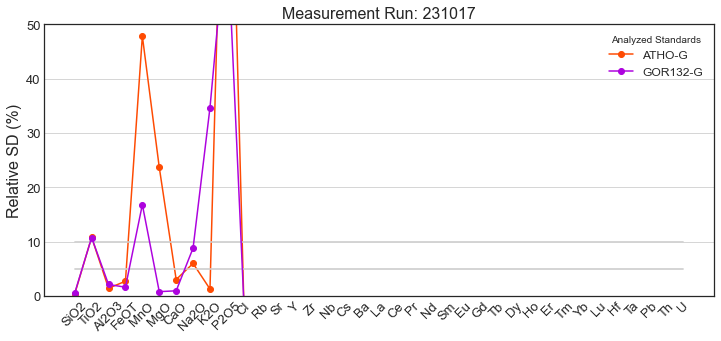

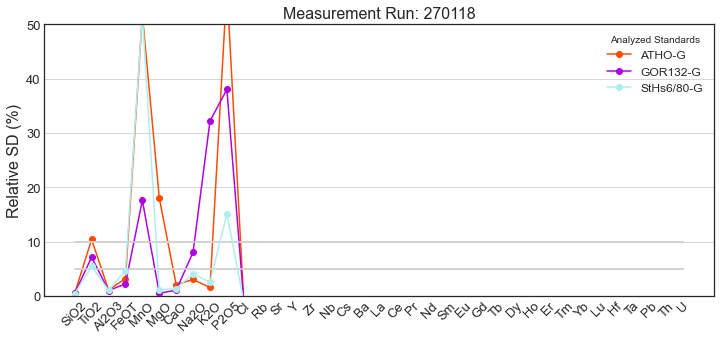

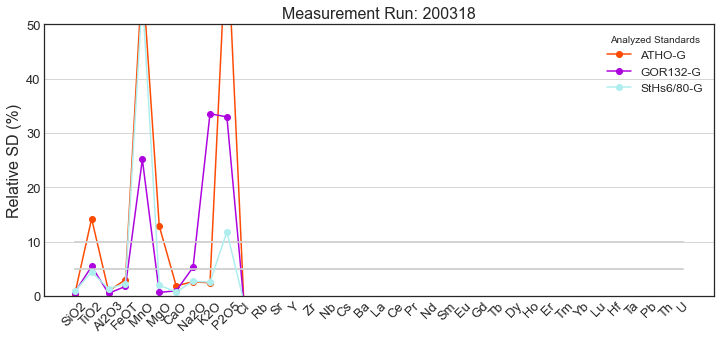

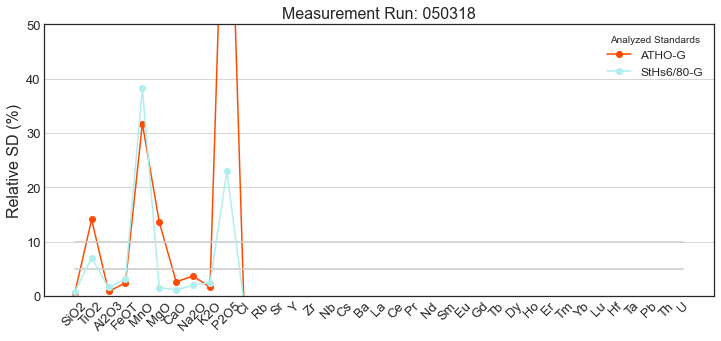

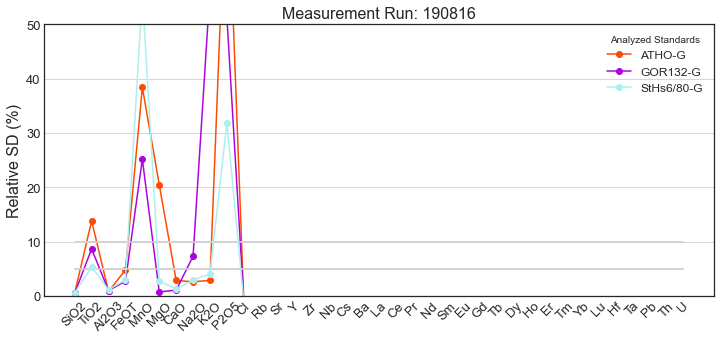

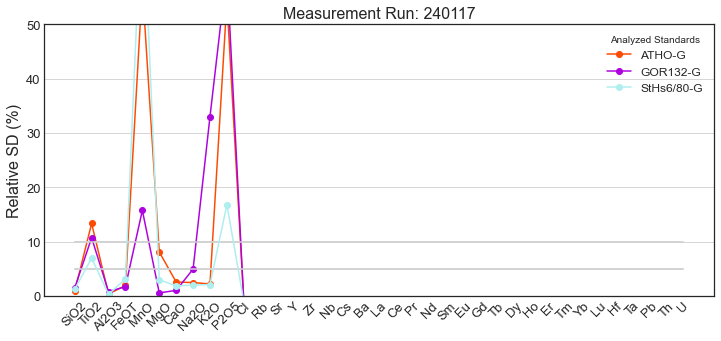

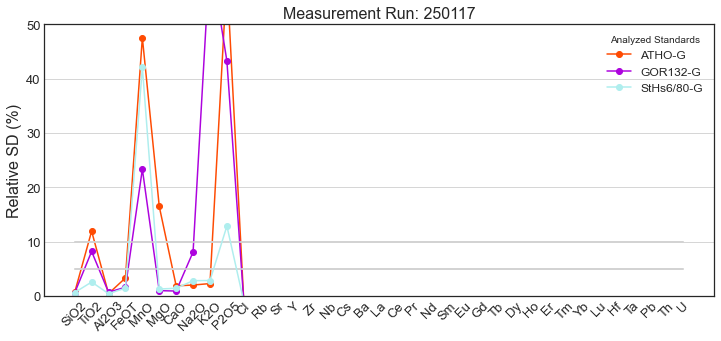

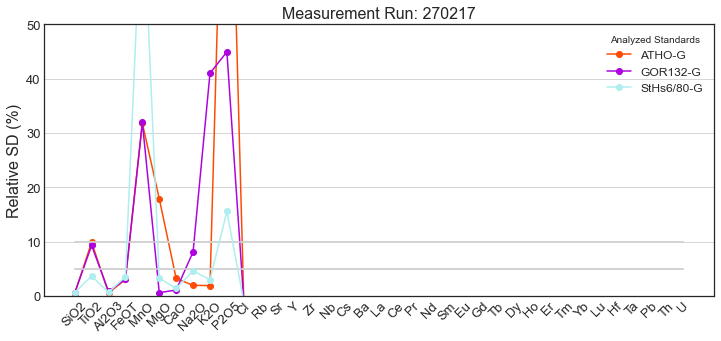

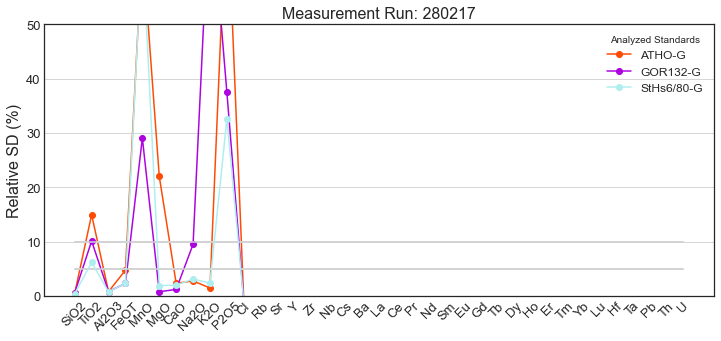

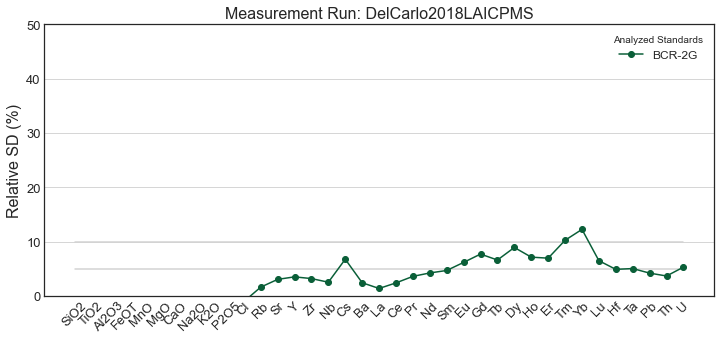

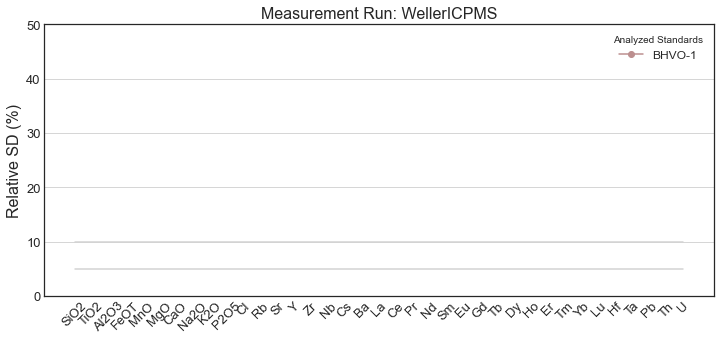

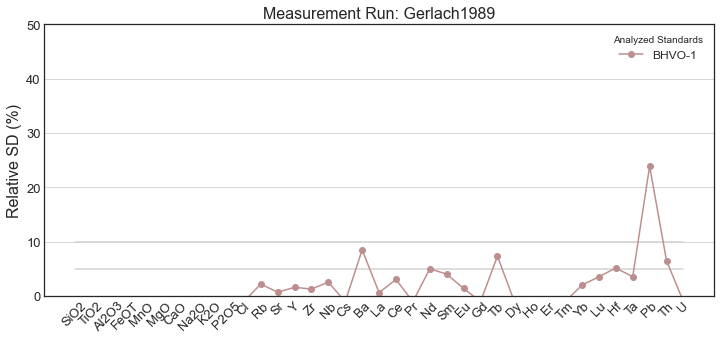

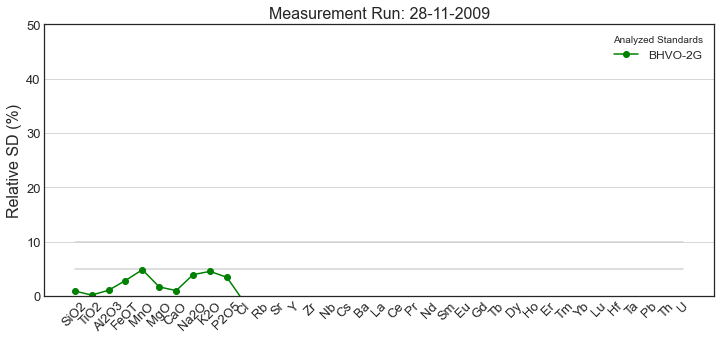

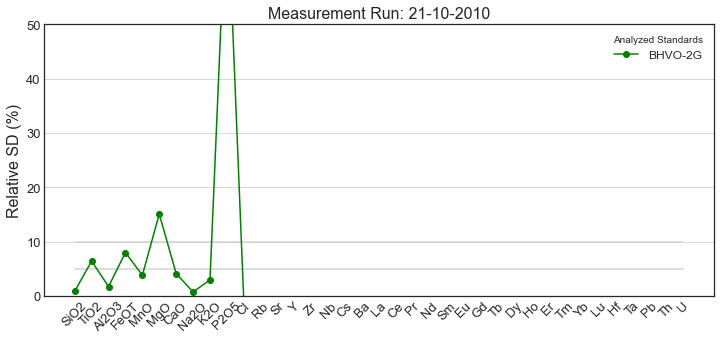

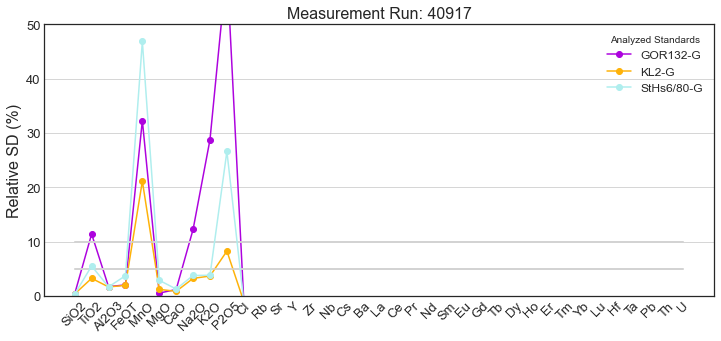

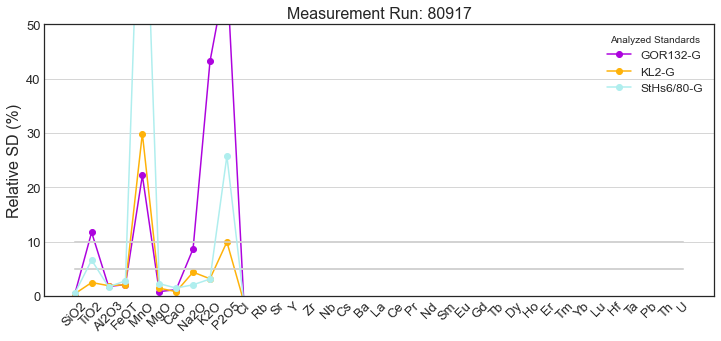

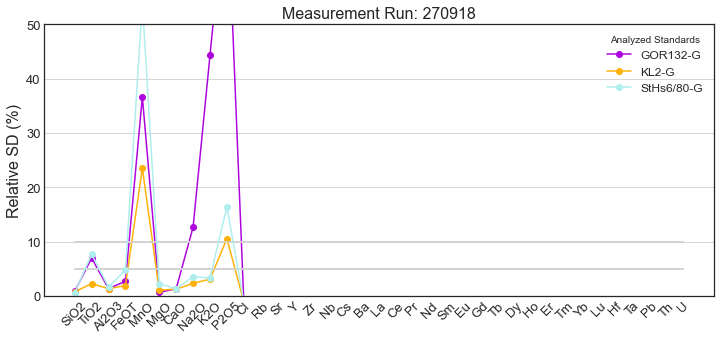

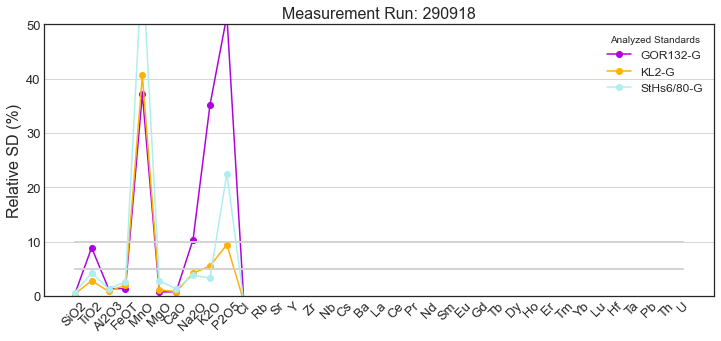

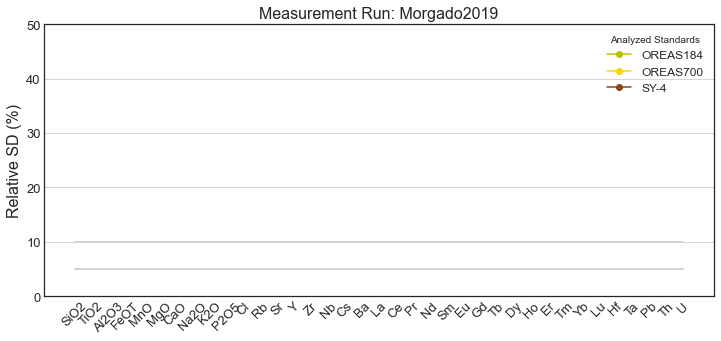

In [161]:
graficar_RSD(Data_standards)

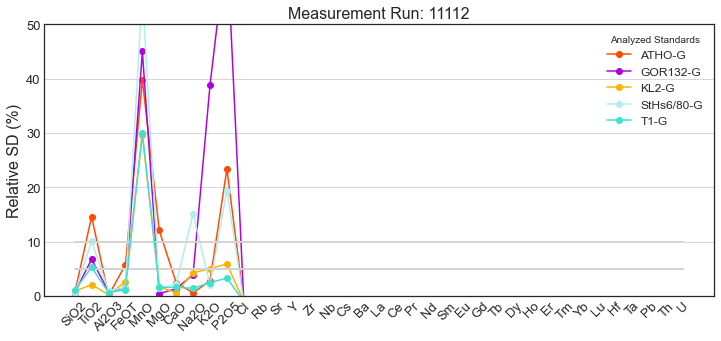

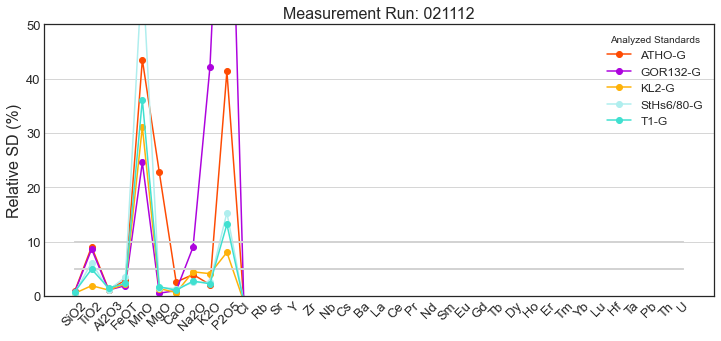

In [162]:
#if you want to check some specific Measurement run you can do the following, adding as many specific runs you want:
graficar_RSD(Data_standards[Data_standards.MeasurementRun.isin(['11112','021112'])])

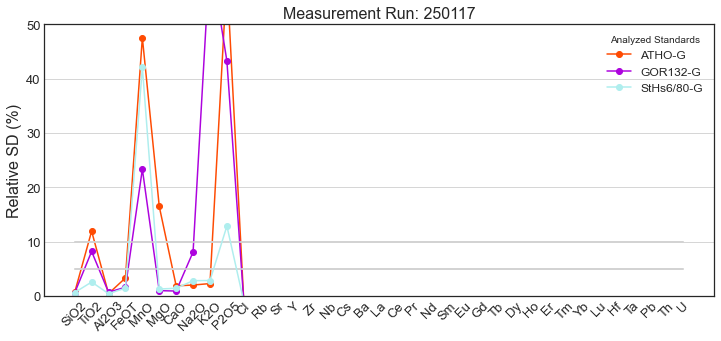

In [163]:
#if you want to check for a specific sample:
graficar_RSD(Data_standards[Data_standards.MeasurementRun.isin(Data[Data.SampleID == 'T-44'].MeasurementRun.unique())])
#if no certified secondarystandards have been analyzed along ith the sample nothing ill be plotted
graficar_RSD(Data_standards[Data_standards.MeasurementRun.isin(Data[Data.SampleID == 'JK193'].MeasurementRun.unique())])

In [41]:
# Plot the presición for all the elements analyzed for each Standards in each MeasurementRun
#grafico
def graficar_presc_todos(TDB_standards):
    
    #first filter the data for which n, SD and thus RSD have not been reported:
    TDB_standards = TDB_standards[TDB_standards.n != 'Not reported']
    
    # Here we choose which set of elements we want to analyze
    elementos = ['SiO2','TiO2','Al2O3','FeOT','MnO','MgO','CaO','Na2O','K2O','P2O5','Cl',
                 'Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']
    elementos_RSD = ['RSD_SiO2','RSD_TiO2','RSD_Al2O3','RSD_FeOT','RSD_MnO','RSD_MgO','RSD_CaO','RSD_Na2O','RSD_K2O','RSD_P2O5',
                     'RSD_Cl','RSD_Rb','RSD_Sr','RSD_Y','RSD_Zr','RSD_Nb','RSD_Cs','RSD_Ba','RSD_La','RSD_Ce','RSD_Pr','RSD_Nd','RSD_Sm','RSD_Eu','RSD_Gd','RSD_Tb','RSD_Dy','RSD_Ho','RSD_Er','RSD_Tm','RSD_Yb','RSD_Lu','RSD_Hf','RSD_Ta','RSD_Pb','RSD_Th','RSD_U']
    linea1 = np.empty(len(elementos_RSD))
    linea1.fill(5)
    linea2 = np.empty(len(elementos_RSD))
    linea2.fill(10)
    TDB_standards = TDB_standards.sort_values(by=['Standard'])
    plt.figure(figsize=(12,5)) 
    ax = plt.axes()        

    for std in TDB_standards.Standard.unique():
        temp = TDB_standards[TDB_standards.Standard==std]
        #print(std)
        #print(len(temp))
        Color = simbología_std(std)
        if len(temp.SiO2) > 3:
            for elemento in elementos_RSD:
                #print(elemento)
                temp2 = temp.dropna(axis = 'rows',subset=([elemento]))
                temp2 = temp2.reset_index(drop=True)
                index2 = temp2.first_valid_index()
                if temp2[elemento].notnull().sum()>1:
                    ax.vlines(elemento,temp2[elemento].mean()-temp2[elemento].std() ,temp2[elemento].mean()+temp2[elemento].std(),colors=Color,linewidth=3.5)
            ax.vlines(elemento,temp2[elemento].mean()-temp2[elemento].std() ,temp2[elemento].mean()+temp2[elemento].std(),colors=Color,linewidth=3.5,label = std +' (' + str(len(temp))+' MRs)')        
                    
        if len(temp.SiO2) <= 3:
            plt.plot(elementos_RSD, temp[elementos_RSD].iloc[0,:],marker = 'o',linestyle='None',ms=4,color = Color,label = std)    
       
    plt.plot(elementos_RSD, linea1,color = 'grey')
    plt.plot(elementos_RSD, linea2,color = 'grey')            
    leg=plt.legend(fancybox=True, bbox_to_anchor=(1,1),ncol=1,fontsize=13, title="Analyzed Standards")
    #plt.ylim(0,30)
    ax.tick_params(labelsize = 15,direction='in',axis='x',rotation=75)
    ax.tick_params(labelsize = 15,direction='in',axis='y')
    
    ax.set_xticklabels(elementos)
    plt.ylabel("RSD (%)", fontsize = 16)
    ax.grid(axis ='y')
    plt.savefig('../Plots/Presicion.pdf',dpi = 300,bbox_inches='tight')#,bbox_extra_artists=(leg,)
    plt.show()

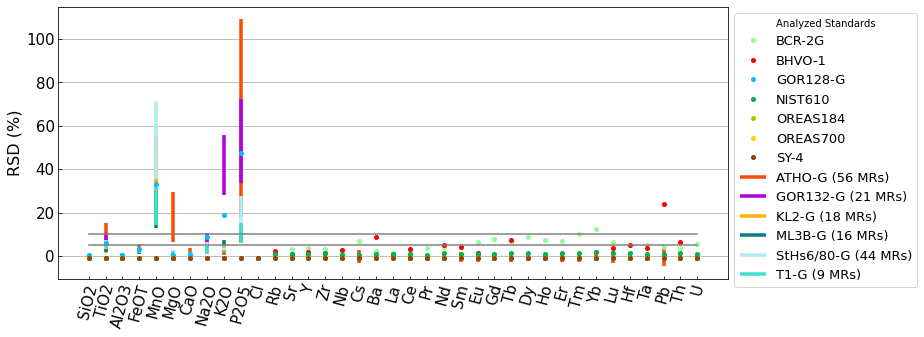

In [42]:
graficar_presc_todos(Data_standards)

In [79]:
print('\033[1m'+ 'Presicion'+ '\033[0m')
print(" ")

for elemento in ['SiO2','TiO2','Al2O3','MnO','MgO','FeOT','CaO','Na2O','K2O','P2O5','Cl',
                             'Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb',
                             'Dy','Ho','Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']:
    print('\033[1m'+ elemento + '\033[0m')
    print('Min: {}, Max: {}, Mean: {}, STD: {}'.format(Data_standards['RSD_'+elemento].min(),Data_standards['RSD_'+elemento].max(),Data_standards['RSD_'+elemento].mean(),Data_standards['RSD_'+elemento].std()))
    print(" ")  

Accuracies
 
SiO2
Min: 0.09468654952839543, Max: 1.5420415670156593, Mean: 0.567471865956947, STD: 0.30010260703898683
 
TiO2
Min: 0.20737061399698173, Max: 92.66986344822213, Mean: 8.557391189687907, STD: 8.97453378691073
 
Al2O3
Min: 0.10935939754436864, Max: 2.8325328908544765, Mean: 0.9659778133245603, STD: 0.4181493076510334
 
MnO
Min: 0.0, Max: 141.4213562373095, Mean: 38.53229823975904, STD: 21.594864249547882
 
MgO
Min: 0.21119868020783694, Max: 100.0, Mean: 10.965908305947293, STD: 17.683004286404156
 
FeOT
Min: 0.5743856561053042, Max: 18.51851851851852, Mean: 3.2636871664486873, STD: 2.291051235662619
 
CaO
Min: 0.37328744554895427, Max: 13.07390215497111, Mean: 1.9559120798710925, STD: 1.730139817263835
 
Na2O
Min: 0.44978694054678, Max: 46.56305929775874, Mean: 4.834177279017795, STD: 4.151827345630545
 
K2O
Min: 0.15391894054828145, Max: 74.81666255342545, Mean: 7.780404673052527, STD: 13.35389575140941
 
P2O5
Min: 3.338568197883989, Max: 206.16902854251938, Mean: 42.3391